1. [Medicaid Overview](#medicaid-overview)  
2. [Import Libraries & Data Loading](#import-libraries--data-loading)  
3. [Objective](#objective)  
4. [Data Inspection](#data-inspection)  
5. [Data Cleaning & Feature Creation](#data-cleaning--feature-creation)  
6. [2022 Spending EDA](#2022-spending-eda)<br>
   A. [Which drugs account for the top 15 highest total spending?](#top-spending-drugs)  
   B. [Which manufacturers are responsible for producing these high-spending drugs?](#top-manufacturers)  
   C. [What are the primary factors contributing to the elevated spending on these drugs?](#spending-factors)  
   D. [Are there viable, cost-effective alternatives available for these high-cost drugs within the database?](#cost-effective-alternatives)  
7. [2018–2022 Trends EDA](#20182022-trends-eda)<br>
   A. [Which drugs exhibit the highest Compound Annual Growth Rate (CAGR) in average spending per dosage unit from 2018 to 2022?](#top-cagr-drugs)  
   B. [Which drugs have exhibited the highest cumulative Medicaid spending from 2018 to 2022?](#cumulative-spending)
8. [Full Report](#full-report)
9. [Let's Connect 🚀](#thank-you)

![](https://cdn.prod.website-files.com/6345fd5afa932e34e6d158b1/638aa45457859fb689bf812c_637be80b6dbeef7dc973df25_636518bc8732877ee90a6323_Medicaid-rehab-coverage-hero-p-1080.jpeg)

<h2 id="medicaid-overview" style="display: none;"></h2>
<a id="import-loading"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 100%;
">
<h1>Medicaid Overview</h1>
</div>

<h2>What is Medicaid?</h2>
<p>Medicaid is a public health insurance program in the United States, jointly funded by federal and state governments. Its main goal is to provide affordable healthcare to individuals and families with limited income and resources, including children, elderly adults, pregnant women, and individuals with disabilities.</p>

<hr>

<h2>How Does Medicaid Work?</h2>

<h3>1. Jointly Funded Program</h3>
<ul>
    <li>Funded by both federal and state governments.</li>
    <li>Federal government provides funds, but states administer their own Medicaid programs, leading to variations across states.</li>
</ul>

<h3>2. Eligibility</h3>
<p>Generally covers:</p>
<ul>
    <li>Low-income families and children</li>
    <li>Pregnant women</li>
    <li>Elderly adults (65+) with limited income</li>
    <li>Individuals with disabilities</li>
</ul>
<p>Eligibility criteria vary by state, typically based on income, family size, age, and disability status.</p>

<h3>3. Coverage</h3>
<p>Typical coverage includes:</p>
<ul>
    <li>Doctor visits and hospitalizations</li>
    <li>Prescription medications</li>
    <li>Preventive care (e.g., vaccines, health screenings)</li>
    <li>Long-term care (e.g., nursing home, home care)</li>
    <li>Mental health services and substance abuse treatment</li>
</ul>

<h3>4. Prescription Drugs & Medicaid</h3>
<ul>
    <li>Prescription medications represent a significant portion of Medicaid spending.</li>
    <li>States negotiate medication prices with manufacturers to control costs.</li>
    <li>Preference for generic medications to reduce spending without compromising patient care.</li>
</ul>

<h3>5. Why Analyze Medicaid Spending?</h3>
<p>Analyzing Medicaid spending helps:</p>
<ul>
    <li>Identify areas to optimize costs.</li>
    <li>Ensure resources are effectively allocated.</li>
    <li>Support informed policy-making and improve healthcare outcomes.</li>
</ul>
<hr>

<h2 id="objective" style="display: none;"></h2>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 100%;
">
<h1>Objective</h1>
</div>

<div class="alert alert-block ">
    <pre style="background-color: black; color: white; padding: 10px; border-radius: 5px; white-space: pre-wrap; word-wrap: break-word;">
"The objective of this analysis is to examine Medicaid drug spending data to identify medications that significantly contribute to overall expenditures, both in terms of total spending and rapid cost growth over time. By analyzing trends such as the Compound Annual Growth Rate (CAGR) in average spending per dosage unit from 2018 to 2022, the analysis aims to uncover high-cost and fast-growing drugs. <br>     
The goal is to highlight opportunities for cost savings by proposing viable, cost-effective alternatives—such as generics or therapeutic equivalents—while maintaining quality of care and delivering actionable insights to support data-driven decision-making."
    </pre>
</div>

<h2 id="import-libraries--data-loading" style="display: none;"></h2>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 100%;
">
<h1>Import Libraries & Data Loading</h1>
</div>

In [225]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from plotly.subplots import make_subplots
from IPython.display import Image, display

plt.rcParams["figure.figsize"] = (6, 6)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [ ]:
df = pd.read_csv("medicaid_spending_by_drug.csv")

<h2 id="data-inspection" style="display: none;"></h2>
<div style="
    border-left: 6px solid #0dcaf0;
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 100%;
">
<h1>Data Inspection</h1>
</div>

In [227]:
df.columns

Index(['Brnd_Name', 'Gnrc_Name', 'Tot_Mftr', 'Mftr_Name', 'Tot_Spndng_2018',
       'Tot_Dsg_Unts_2018', 'Tot_Clms_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018',
       'Avg_Spnd_Per_Clm_2018', 'Outlier_Flag_2018', 'Tot_Spndng_2019',
       'Tot_Dsg_Unts_2019', 'Tot_Clms_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2019',
       'Avg_Spnd_Per_Clm_2019', 'Outlier_Flag_2019', 'Tot_Spndng_2020',
       'Tot_Dsg_Unts_2020', 'Tot_Clms_2020', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020',
       'Avg_Spnd_Per_Clm_2020', 'Outlier_Flag_2020', 'Tot_Spndng_2021',
       'Tot_Dsg_Unts_2021', 'Tot_Clms_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021',
       'Avg_Spnd_Per_Clm_2021', 'Outlier_Flag_2021', 'Tot_Spndng_2022',
       'Tot_Dsg_Unts_2022', 'Tot_Clms_2022', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022',
       'Avg_Spnd_Per_Clm_2022', 'Outlier_Flag_2022',
       'Chg_Avg_Spnd_Per_Dsg_Unt_21_22', 'CAGR_Avg_Spnd_Per_Dsg_Unt_18_22'],
      dtype='object')

In [228]:
df.shape

(16459, 36)

In [229]:
df.size

592524

In [230]:
df.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2018,Tot_Dsg_Unts_2018,Tot_Clms_2018,Avg_Spnd_Per_Dsg_Unt_Wghtd_2018,Avg_Spnd_Per_Clm_2018,Outlier_Flag_2018,...,Avg_Spnd_Per_Clm_2021,Outlier_Flag_2021,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22,CAGR_Avg_Spnd_Per_Dsg_Unt_18_22
0,A & D,Vitamins A And D,1,Overall,252.22,36845.0,84.0,0.006845,3.002619,1.0,...,9.760000,1.0,129.83,5884.5,17,0.022063,7.637059,1,0.356607,0.339881
1,A & D,Vitamins A And D,1,Schering-Plough,252.22,36845.0,84.0,0.006845,3.002619,1.0,...,9.760000,1.0,129.83,5884.5,17,0.022063,7.637059,1,-0.205675,0.339881
2,A And D,Vits A And D/White Pet/Lanolin,1,Overall,213.70,2113.7,28.0,0.101102,7.632143,1.0,...,7.603571,1.0,286.30,1113.5,17,0.257117,16.841176,1,1.494382,0.262823
3,A And D,Vits A And D/White Pet/Lanolin,1,Bayer Healthcar,213.70,2113.7,28.0,0.101102,7.632143,1.0,...,7.603571,1.0,286.30,1113.5,17,0.257117,16.841176,1,1.494382,0.262823
4,A And D Diaper Rash,"Dimethic/Zinc Ox/Vits A,D/Aloe",1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,3.192381,1.0,45.45,1365.5,25,0.033285,1.818000,1,-0.392151,-0.234385


In [231]:
df.tail()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2018,Tot_Dsg_Unts_2018,Tot_Clms_2018,Avg_Spnd_Per_Dsg_Unt_Wghtd_2018,Avg_Spnd_Per_Clm_2018,Outlier_Flag_2018,...,Avg_Spnd_Per_Clm_2021,Outlier_Flag_2021,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22,CAGR_Avg_Spnd_Per_Dsg_Unt_18_22
16454,Zyvox,Linezolid,1,Pharmaci/Pfizer,284708.71,12828.0,95.0,113.114134,2996.933789,1.0,...,1283.354091,1.0,23477.04,3529.0,25,22.641923,939.081600,1,-0.676171,-0.331119
16455,Zyvox,Linezolid In Dextrose 5%,3,Overall,236119.63,2507910.0,785.0,0.123575,300.789338,0.0,...,173.085854,0.0,66948.35,352512.0,376,0.200458,178.054122,0,0.215621,0.128556
16456,Zyvox,Linezolid In Dextrose 5%,1,Pharmacia-Uj-No,24927.29,102880.0,143.0,0.242295,174.316713,1.0,...,177.281127,0.0,1722.76,16821.0,22,0.102417,78.307273,1,-0.646156,-0.193680
16457,Zyvox,Linezolid In Dextrose 5%,1,Pharmaci/Pfizer,170497.69,2014951.0,443.0,0.093900,384.870632,0.0,...,256.757245,0.0,35759.44,126649.0,165,0.281684,216.723879,0,0.440517,0.316056
16458,Zyvox,Linezolid In Dextrose 5%,1,Phar-Prep/Pfize,40694.65,390079.0,199.0,0.104324,204.495729,0.0,...,77.015612,0.0,29466.15,209042.0,189,0.140958,155.905556,0,-0.167119,0.078143


In [232]:
df.sample(5)

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2018,Tot_Dsg_Unts_2018,Tot_Clms_2018,Avg_Spnd_Per_Dsg_Unt_Wghtd_2018,Avg_Spnd_Per_Clm_2018,Outlier_Flag_2018,...,Avg_Spnd_Per_Clm_2021,Outlier_Flag_2021,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22,CAGR_Avg_Spnd_Per_Dsg_Unt_18_22
9340,Mesalamine Dr,Mesalamine,3,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,383.231185,0.0,5007657.14,2312479.000,12797,2.166466,391.314929,0,0.009784,-0.049949
5995,Flarex,Fluorometholone Acetate,2,Overall,37450.76,2875.000,554.0,13.026351,67.600650,0.0,...,120.959223,0.0,853217.00,33960.000,6552,25.127476,130.222375,0,0.267070,0.178505
3811,Daptomycin,Daptomycin,1,West-Ward/Hikma,NaN,NaN,NaN,NaN,NaN,NaN,...,217.241093,1.0,117626.79,10994.988,1928,10.698219,61.009746,1,-0.887851,-0.496219
10522,Neostigmine Methylsulfate*,Neostigmine Methylsulfate,1,Dr.Reddy'S Lab,4344.43,50.500,18.0,100.614443,241.357222,1.0,...,76.701142,1.0,96764.99,7285.130,1122,13.107323,86.243307,1,1.404065,-0.399223
14014,Stiolto Respimat,Tiotropium Br/Olodaterol HCl,1,Overall,29539963.69,331712.138,80888.0,89.053008,365.195872,0.0,...,451.714019,0.0,73282786.65,667539.965,156307,109.780373,468.838802,0,0.035394,0.053705


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        16459 non-null  object 
 1   Gnrc_Name                        16459 non-null  object 
 2   Tot_Mftr                         16459 non-null  int64  
 3   Mftr_Name                        16459 non-null  object 
 4   Tot_Spndng_2018                  11541 non-null  float64
 5   Tot_Dsg_Unts_2018                11541 non-null  float64
 6   Tot_Clms_2018                    11541 non-null  float64
 7   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  11541 non-null  float64
 8   Avg_Spnd_Per_Clm_2018            11541 non-null  float64
 9   Outlier_Flag_2018                11541 non-null  float64
 10  Tot_Spndng_2019                  12720 non-null  float64
 11  Tot_Dsg_Unts_2019                12720 non-null  float64
 12  Tot_Clms_2019     

In [234]:
df.nunique()

Brnd_Name                           4194
Gnrc_Name                           2458
Tot_Mftr                              34
Mftr_Name                            980
Tot_Spndng_2018                     9157
Tot_Dsg_Unts_2018                   9016
Tot_Clms_2018                       6790
Avg_Spnd_Per_Dsg_Unt_Wghtd_2018     9157
Avg_Spnd_Per_Clm_2018               9157
Outlier_Flag_2018                      2
Tot_Spndng_2019                    10153
Tot_Dsg_Unts_2019                   9974
Tot_Clms_2019                       7226
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019    10154
Avg_Spnd_Per_Clm_2019              10154
Outlier_Flag_2019                      2
Tot_Spndng_2020                    11097
Tot_Dsg_Unts_2020                  10829
Tot_Clms_2020                       7415
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020    11097
Avg_Spnd_Per_Clm_2020              11097
Outlier_Flag_2020                      2
Tot_Spndng_2021                    12124
Tot_Dsg_Unts_2021                  11739
Tot_Clms_2021   

In [235]:
df.duplicated().sum()

np.int64(0)

In [236]:
for col in df.select_dtypes(include=['object']).columns:
    has_whitespace = df[col].str.match(r'^\s|\s$').any()
    print(f"Column '{col}' has leading/trailing whitespace: {has_whitespace}")

Column 'Brnd_Name' has leading/trailing whitespace: False
Column 'Gnrc_Name' has leading/trailing whitespace: False
Column 'Mftr_Name' has leading/trailing whitespace: False


In [237]:
df.isnull().sum()

Brnd_Name                             0
Gnrc_Name                             0
Tot_Mftr                              0
Mftr_Name                             0
Tot_Spndng_2018                    4918
Tot_Dsg_Unts_2018                  4918
Tot_Clms_2018                      4918
Avg_Spnd_Per_Dsg_Unt_Wghtd_2018    4918
Avg_Spnd_Per_Clm_2018              4918
Outlier_Flag_2018                  4918
Tot_Spndng_2019                    3739
Tot_Dsg_Unts_2019                  3739
Tot_Clms_2019                      3739
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019    3739
Avg_Spnd_Per_Clm_2019              3739
Outlier_Flag_2019                  3739
Tot_Spndng_2020                    2638
Tot_Dsg_Unts_2020                  2638
Tot_Clms_2020                      2638
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020    2638
Avg_Spnd_Per_Clm_2020              2638
Outlier_Flag_2020                  2638
Tot_Spndng_2021                    1486
Tot_Dsg_Unts_2021                  1486
Tot_Clms_2021                      1486


<Axes: >

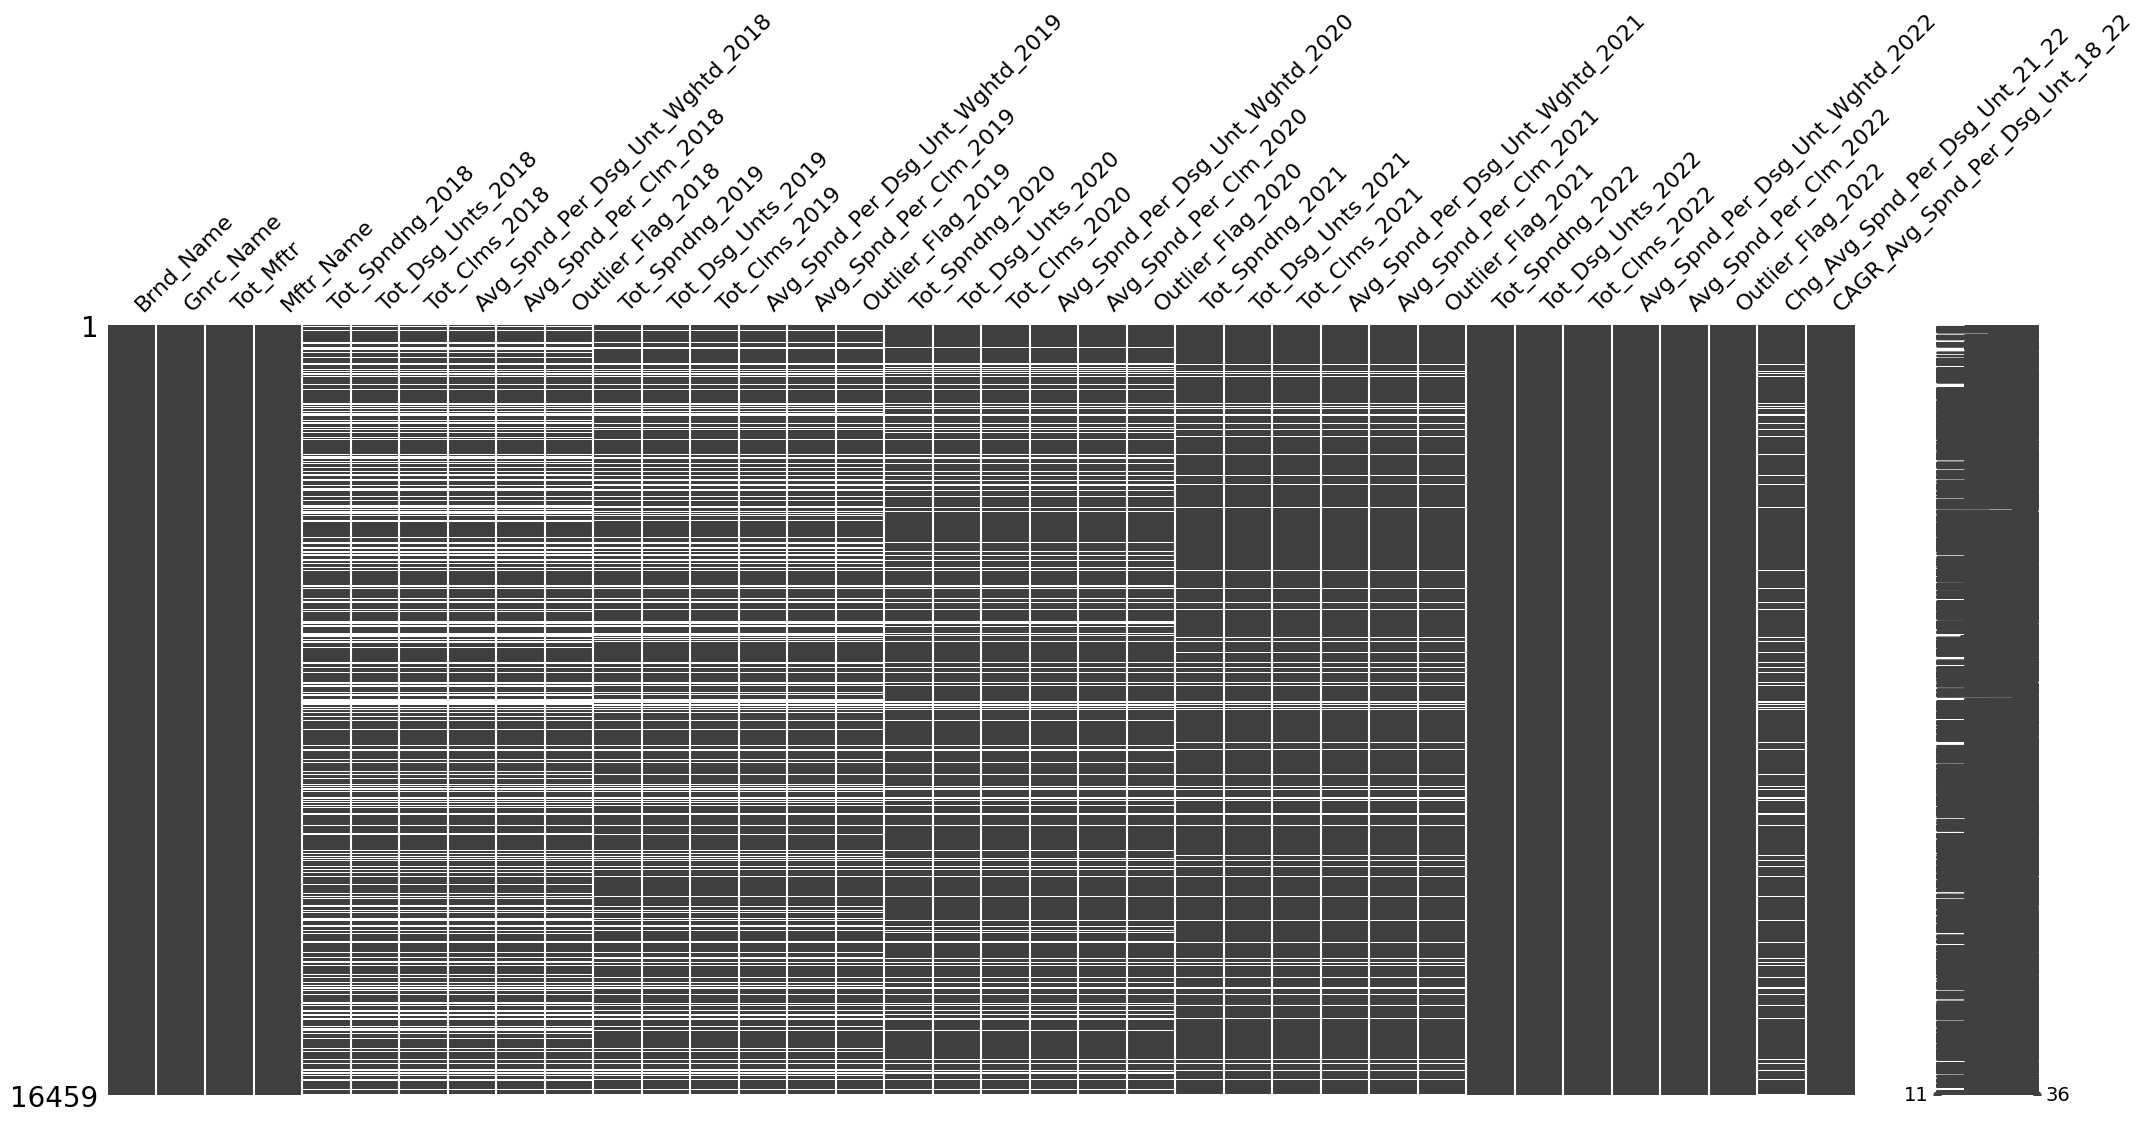

In [238]:
msno.matrix(df)

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #0dcaf0;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="list-style-type: none; padding: 0; margin: 0;">
    <li style="margin-top: 8px;"><strong>Shape:</strong> 16,459 rows × 36 columns</li>
    <li style="margin-top: 8px;"><strong>Size:</strong> 592,524 total data points</li>
    <li style="margin-top: 8px;"><strong>Column Types:</strong> 30 float, 3 integer, and 3 object columns</li>
    <li style="margin-top: 8px;"><strong>Duplicate Rows:</strong> None detected</li>
    <li style="margin-top: 8px;"><strong>Leading/Trailing Whitespace:</strong> None found in string fields</li>
    <li style="margin-top: 8px;">
      <strong>Missing Values by Year:</strong> The dataset contains the following number of missing (Null/NaN) entries for key columns:
      <ul style="margin-top: 8px;">
        <li><strong>2018:</strong> 4,918</li>
        <li><strong>2019:</strong> 3,839</li>
        <li><strong>2020:</strong> 2,638</li>
        <li><strong>2021:</strong> 1,486</li>
        <li><strong>2022:</strong> <span style="color:#4CAF50;"><strong>None</strong></span></li>
      </ul>
      <p style="margin-top: 10px;">
        This downward trend in missing values suggests improved reporting completeness over time, 
        with <strong>full data available for 2022</strong>.
      </p>
    </li>
    <li style="margin-top: 8px;">
      <strong>Non-Drug Entry:</strong> An aggregate row labeled <code>"Overall"</code> was identified under the <code>manufacturer_name</code> column. 
      This row represents summary totals and is not tied to a specific drug. 
      It should be excluded from analyses focused on individual manufacturers or drugs but will prove useful for analyzing overall trends.
    </li>
  </ul>
</div>


<h2 id="data-cleaning--feature-creation" style="display: none;"></h2>
<div style="
    border-left: 6px solid #f7f148;
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 100%;
">
<h1>Data Cleaning & Feature Creation</h1>
</div>

In [239]:
df = df.drop(columns=[
    'Tot_Mftr',
    'Tot_Clms_2018', 'Tot_Clms_2019', 'Tot_Clms_2020', 'Tot_Clms_2021',
    'Tot_Dsg_Unts_2018', 'Tot_Dsg_Unts_2019', 'Tot_Dsg_Unts_2020', 'Tot_Dsg_Unts_2021',
    'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021',
    'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2019',
    'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021',
    'Outlier_Flag_2018', 'Outlier_Flag_2019', 'Outlier_Flag_2020',
    'Outlier_Flag_2021', 'Outlier_Flag_2022',
    'Chg_Avg_Spnd_Per_Dsg_Unt_21_22'
])

In [240]:
rename_columns_dict = {
    'Brnd_Name': 'brand_name',
    'Gnrc_Name': 'generic_name',
    'Mftr_Name': 'manufacturer_name',
    'Tot_Spndng_2018': 'total_spending_2018',
    'Tot_Spndng_2019': 'total_spending_2019',
    'Tot_Spndng_2020': 'total_spending_2020',
    'Tot_Spndng_2021': 'total_spending_2021',
    'Tot_Spndng_2022': 'total_spending_2022',
    'Tot_Clms_2022': 'total_claims_2022',
    'Tot_Dsg_Unts_2022': 'total_dosage_units_2022',
    'Avg_Spnd_Per_Clm_2022': 'average_spending_per_claim_2022',
    'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022': 'average_spending_per_dosage_unit_weighted_2022',
    'CAGR_Avg_Spnd_Per_Dsg_Unt_18_22': 'cagr_average_spending_per_dosage_unit_2018_2022'
}

df.rename(columns=rename_columns_dict, inplace=True)

print('Dataframe columns successfully renamed.')

Dataframe columns successfully renamed.


In [241]:
df['brand_name_cleaned'] = df['brand_name'].str.replace('*', '', regex=False).str.strip()
df['generic_name_cleaned'] = df['generic_name'].str.replace('*', '', regex=False).str.strip()

def classify_drug_type(row):
    brand = row['brand_name_cleaned'].lower()
    generic = row['generic_name_cleaned'].lower()
    
    if brand == generic:
        return 'Generic'
    elif generic in brand and not any(keyword in brand for keyword in \
                                      ['pen', 'kit', 'inject', 'solution', 'tablet', 'infusion']):
        return 'Generic'
    else:
        return 'Branded'

df['drug_type'] = df.apply(classify_drug_type, axis=1)

In [242]:
df['manufacturer_name'] = df['manufacturer_name'].str.replace('*', '', regex=False).str.strip()

In [243]:
spending_history_complete = ['total_spending_2018', 'total_spending_2019', 'total_spending_2020', 'total_spending_2021', 'total_spending_2022']
df['report_years_count'] = df[spending_history_complete].notnull().sum(axis=1)
report_counts = df['report_years_count'].value_counts().sort_index()
report_counts

report_years_count
1     1314
2     1212
3     1251
4     1387
5    11295
Name: count, dtype: int64

In [244]:
df["complete_reporting"] = df.apply(
    lambda row: "Complete" if row["report_years_count"] == 5 else "Incomplete",
    axis=1
)

In [245]:
df_complete = df[(
    df['complete_reporting'] == "Complete") & (df['cagr_average_spending_per_dosage_unit_2018_2022'].notna())]\
    .copy()

print(df_complete.isnull().sum())

brand_name                                         0
generic_name                                       0
manufacturer_name                                  0
total_spending_2018                                0
total_spending_2019                                0
total_spending_2020                                0
total_spending_2021                                0
total_spending_2022                                0
total_dosage_units_2022                            0
total_claims_2022                                  0
average_spending_per_dosage_unit_weighted_2022     0
average_spending_per_claim_2022                    0
cagr_average_spending_per_dosage_unit_2018_2022    0
brand_name_cleaned                                 0
generic_name_cleaned                               0
drug_type                                          0
report_years_count                                 0
complete_reporting                                 0
dtype: int64


In [246]:
df = df[df['manufacturer_name'] != 'Overall']
df_overall_complete = df_complete[df_complete['manufacturer_name'] == 'Overall'].copy()

<h3 style="margin-bottom: 10px; font-weight: bold;">Cleaning & Feature Engineering Steps</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #f7f148;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none">
      <li style="margin-top: 8px;">
        <strong>Column Cleanup:</strong> Unused columns were dropped to streamline the dataset, and remaining columns were renamed for improved readability and consistency. 
        This included converting original column names into more descriptive, lowercase formats (e.g.,<code>Tot_Spndng_2022</code> → <code>total_spending_2022</code>).
    </li>
    <li style="margin-top: 8px;">
      <strong>Filtered Dataset:</strong> The DataFrame <code>df</code> was created by removing rows where <code>manufacturer_name</code> equals <code>"Overall"</code>. 
      These aggregate rows represent total values across all manufacturers and are not tied to specific drugs.
    </li>
    <li style="margin-top: 8px;">
      <strong>Manufacturer Name Cleaning:</strong> Asterisks (<code>*</code>) were removed from entries in the <code>manufacturer_name</code> column 
      to standardize and clean the manufacturer labels for consistent analysis.
    </li>
    <li style="margin-top: 8px;">
      <strong>Complete 5-Year Dataset:</strong> The DataFrame <code>df_overall_complete</code> contains only entries with complete data from 2018 to 2022, 
      and includes only the <code>"Overall"</code> manufacturer rows. This subset is used for analyzing long-term trends.
    </li>
    <li style="margin-top: 8px;">
      <strong>Drug Type Feature:</strong> A new column <code>drug_type</code> was created to classify drugs as either <code>"Branded"</code> or <code>"Generic"</code>, 
      based on whether the brand and generic names match. This feature helps differentiate spending and usage patterns by drug category.
    </li>
  </ul>
</div>


<h2 id="2022-spending-eda" style="display: none;"></h2>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    border-left: 6px solid #4CAF50;
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 100%;
">
<h1>2022 Spending Analysis EDA</h1>
    Goal: Identify high-expenditure drugs and cost-saving opportunities (regardless of reporting history)
</div>

In [ ]:
drug_type_counts = df['drug_type'].value_counts().reset_index()
drug_type_counts.columns = ['drug_type', 'count']

fig = px.bar(
    drug_type_counts,
    x='drug_type',
    y='count',
    title='Drug Type Distribution',
    labels={'drug_type': 'Drug Type', 'count': 'Count'},
    template='plotly_dark',
    color='drug_type',
    text='count',
    color_discrete_map={'Generic': 'white', 'Branded': 'steelblue'}
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=True 
    ),
    yaxis=dict(
        title='',      
        showticklabels=False
    ),
    showlegend=False
)

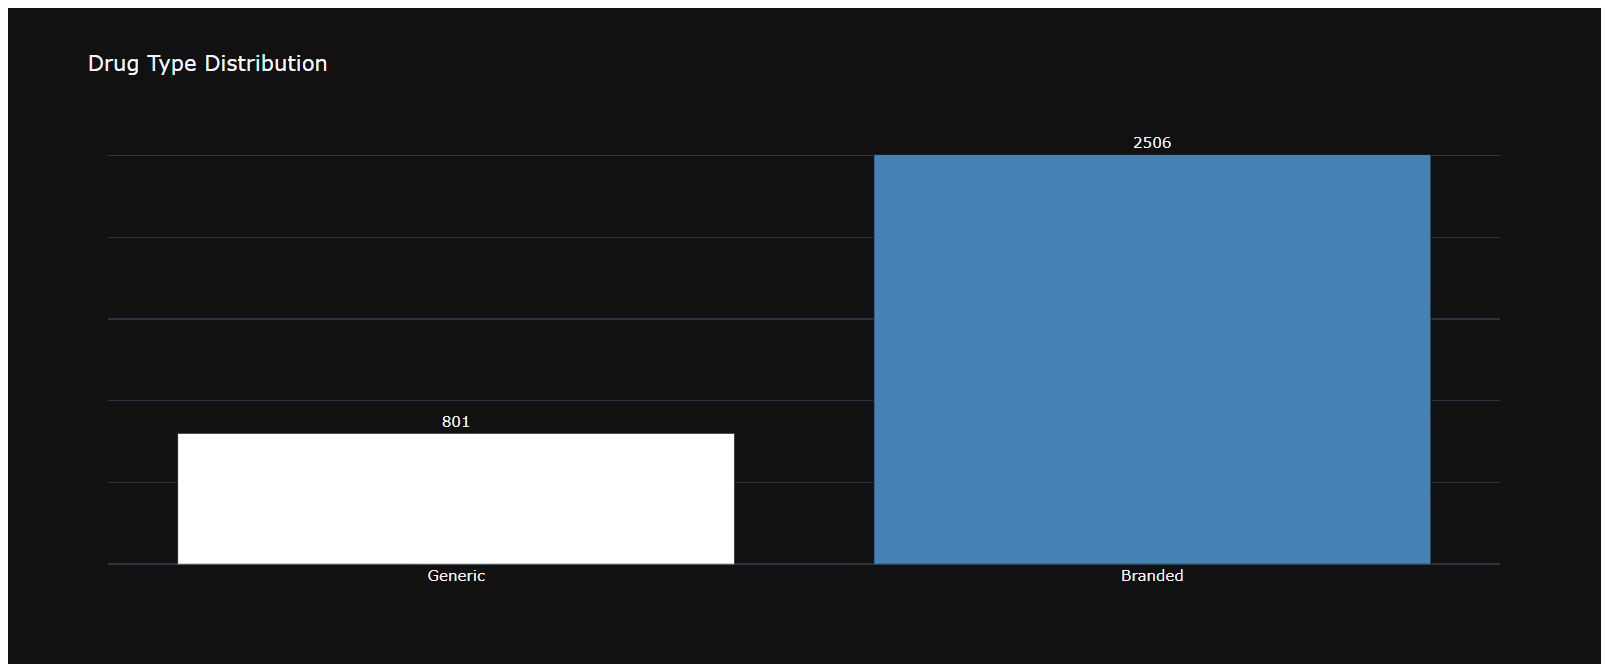

In [247]:
display(Image(filename='Plots/drug_type_distribution_spending.png'))

In [ ]:
drug_type_counts = df['complete_reporting'].value_counts().reset_index()
drug_type_counts.columns = ['complete_reporting', 'count']

fig = px.bar(
    drug_type_counts,
    x='complete_reporting',
    y='count',
    title='5 Year Reporting History',
    labels={'complete_reporting': 'Reporting', 'count': 'Count'},
    template='plotly_dark',
    color='complete_reporting',
    text='count',
    color_discrete_map={'Complete': 'steelblue', 'Incomplete': 'white'},
    category_orders={'complete_reporting': ['Incomplete', 'Complete']}
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=True 
    ),
    yaxis=dict(
        title='',      
        showticklabels=False
    ),
    showlegend=False
)

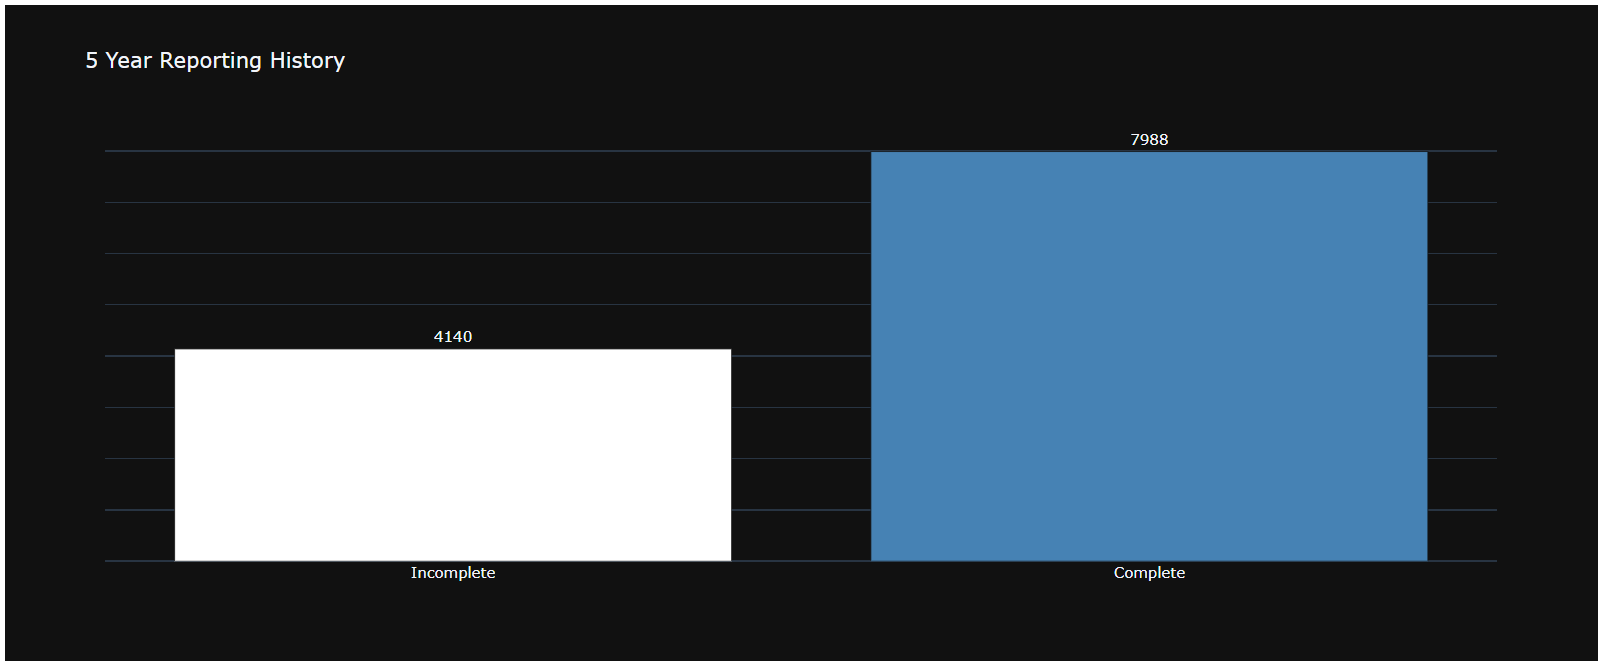

In [248]:
display(Image(filename='Plots/5_years_reported_spending.png'))

In [ ]:
drug_type_counts = df['report_years_count'].astype(str).value_counts().reset_index()
drug_type_counts.columns = ['report_years_count', 'count']

fig = px.bar(
    drug_type_counts,
    x='report_years_count',
    y='count',
    title='Years Reported Distribution',
    labels={'report_years_count': 'Years Reported', 'count': 'Count'},
    template='plotly_dark',
    color='report_years_count',
    text='count',
    color_discrete_map = {
    '1': 'white',
    '2': 'white',
    '3': 'white',
    '4': 'white',
    '5': 'steelblue'
    },
    category_orders={'report_years_count': ['1', '2', '3', '4', '5']}
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=True 
    ),
    yaxis=dict(
        title='',      
        showticklabels=False
    ),
    showlegend=False
)

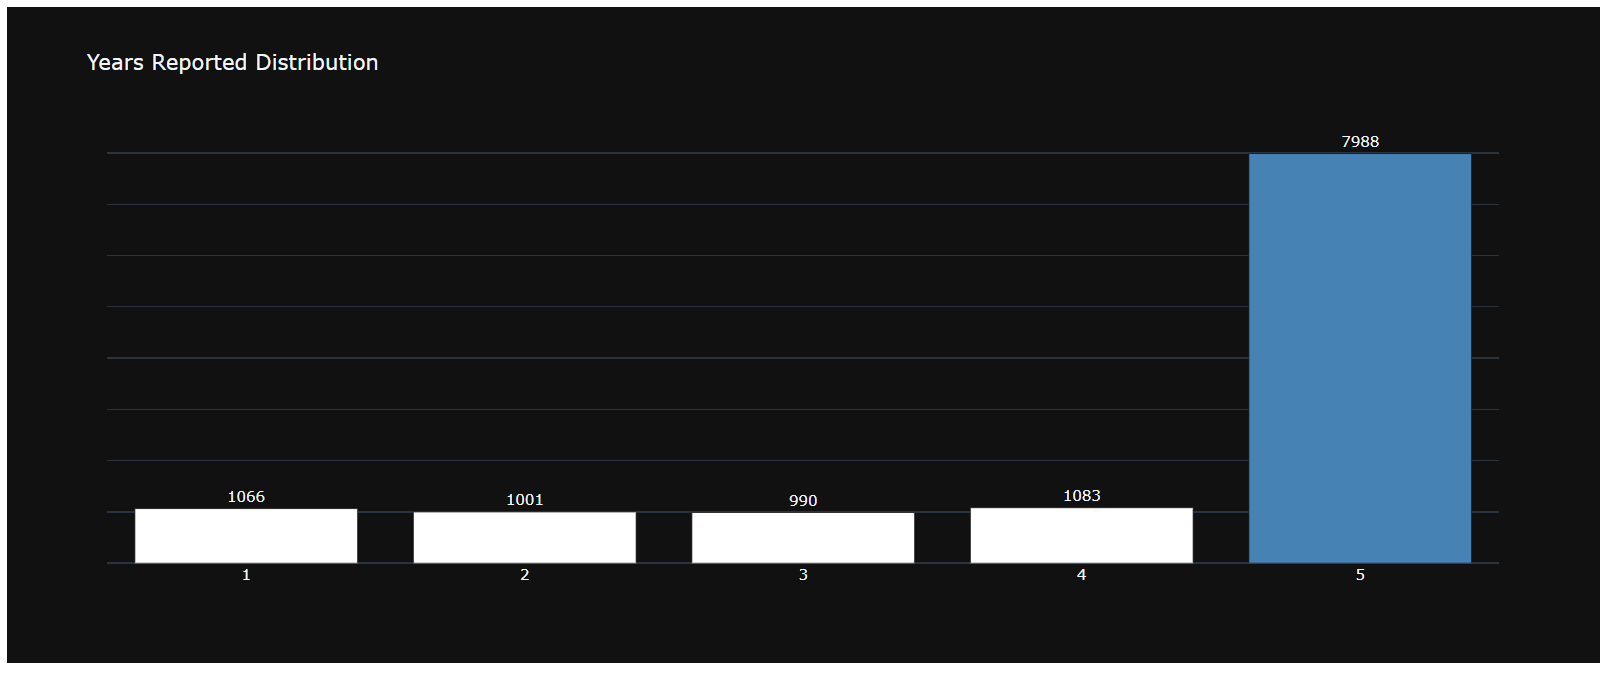

In [249]:
display(Image(filename='Plots/years_reported_spending.png'))

In [250]:
print('Description of Total Spending (2022)')
df['total_spending_2022'].describe().apply(lambda x: f"{x:,.0f}")

Description of Total Spending (2022)


count           12,128
mean         7,863,490
std         66,590,994
min                  0
25%             27,479
50%            250,057
75%          1,579,380
max      3,458,878,902
Name: total_spending_2022, dtype: object

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      The dataset includes <strong>12,128 drugs</strong> with reported total Medicaid spending in 2022.
    </li>
    <li style="margin-top: 8px;">
      The <strong>average spending</strong> per drug was approximately <strong>$7.86 million</strong>, but this figure is heavily skewed by a small number of high-cost drugs.
    </li>
    <li style="margin-top: 8px;">
      The <strong>median spending</strong> was only <strong>$250,057</strong>, and <strong>75% of all drugs</strong> had spending below <strong>$1.58 million</strong>, highlighting how concentrated spending is among a limited set of drugs.
    </li>
    <li style="margin-top: 8px;">
      The <strong>standard deviation</strong> of over <strong>$66.6 million</strong> and a <strong>maximum spending</strong> of <strong>$3.46 billion</strong> (Humira) further confirm the presence of extreme outliers that significantly impact total expenditures.
    </li>
    <li style="margin-top: 8px;">
      This highly right-skewed distribution emphasizes the importance of focusing cost-containment efforts on the top-spending drugs, which account for a disproportionately large share of Medicaid’s drug budget.
    </li>
  </ul>
</div>


In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Histogram (Log Scale)", "Box Plot"),
    shared_yaxes=False
)

fig.add_trace(
    go.Histogram(
        x=df['total_spending_2022'],
        name='Histogram',
        marker=dict(color='steelblue'),
        nbinsx=30
    ),
    row=1, col=1
)

fig.update_yaxes(type='log', row=1, col=1)
fig.add_trace(
    go.Box(
        y=df['total_spending_2022'],
        name='Box Plot',
        marker=dict(color='orange'),
        boxmean='sd',
        customdata=df['brand_name_cleaned'],
        hovertemplate='<b>%{customdata}</b><br>Spending: $%{y:.0f}<extra></extra>'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribution of Total Spending (2022)",
    template='plotly_dark',
    showlegend=False
)

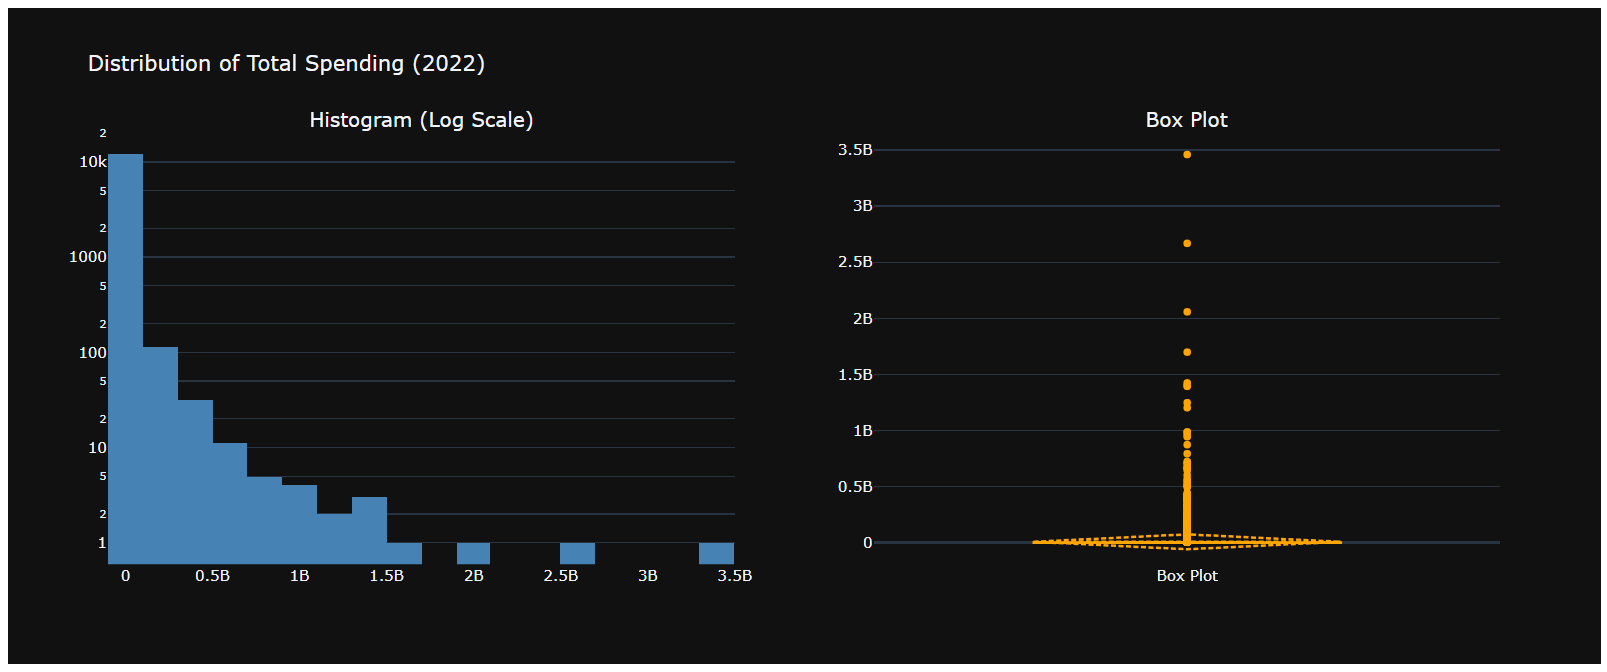

In [251]:
display(Image(filename='Plots/hist_box_spending.png'))

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      The distribution of <code>total_spending_2022</code> is highly <strong>right-skewed</strong>, with most drugs clustered at the lower end of the spending scale.
      Over <strong>16,000 drugs</strong> fall into the lowest bin, while only a handful exceed $100 million in annual spending.
    </li>
    <li style="margin-top: 8px;">
      The <strong>median spending</strong> is approximately <strong>$330,000</strong>, while the <strong>mean</strong> is inflated to over <strong>$11.5 million</strong> due to a small number of extreme outliers — such as Humira — which alone exceeds <strong>$3.45 billion</strong> in Medicaid spending.
    </li>
    <li style="margin-top: 8px;">
      This stark contrast between the mean and median, along with the high standard deviation ($80.9M), underscores the impact of a few high-cost drugs on the overall budget and justifies deeper analysis of the top outliers.
    </li>
  </ul>
</div>

In [ ]:
fig = px.box(
    df,
    x='drug_type',
    y='total_spending_2022',
    points='all',
    title='Spending Distribution: Branded vs Generic (2022)',
    template='plotly_dark',
    color='drug_type',
    color_discrete_map={'Generic': 'white', 'Branded': 'steelblue'},
    hover_name='brand_name_cleaned',
    labels={
        'total_spending_2022': 'Total Spending ($)',
        'drug_type': 'Drug Type',
        'brand_name_cleaned':'Brand Name'
    },
)

fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=True 
    ),
    yaxis_type='log',
    yaxis=dict(
        title='',      
        showticklabels=True
    ),
    showlegend=False
)

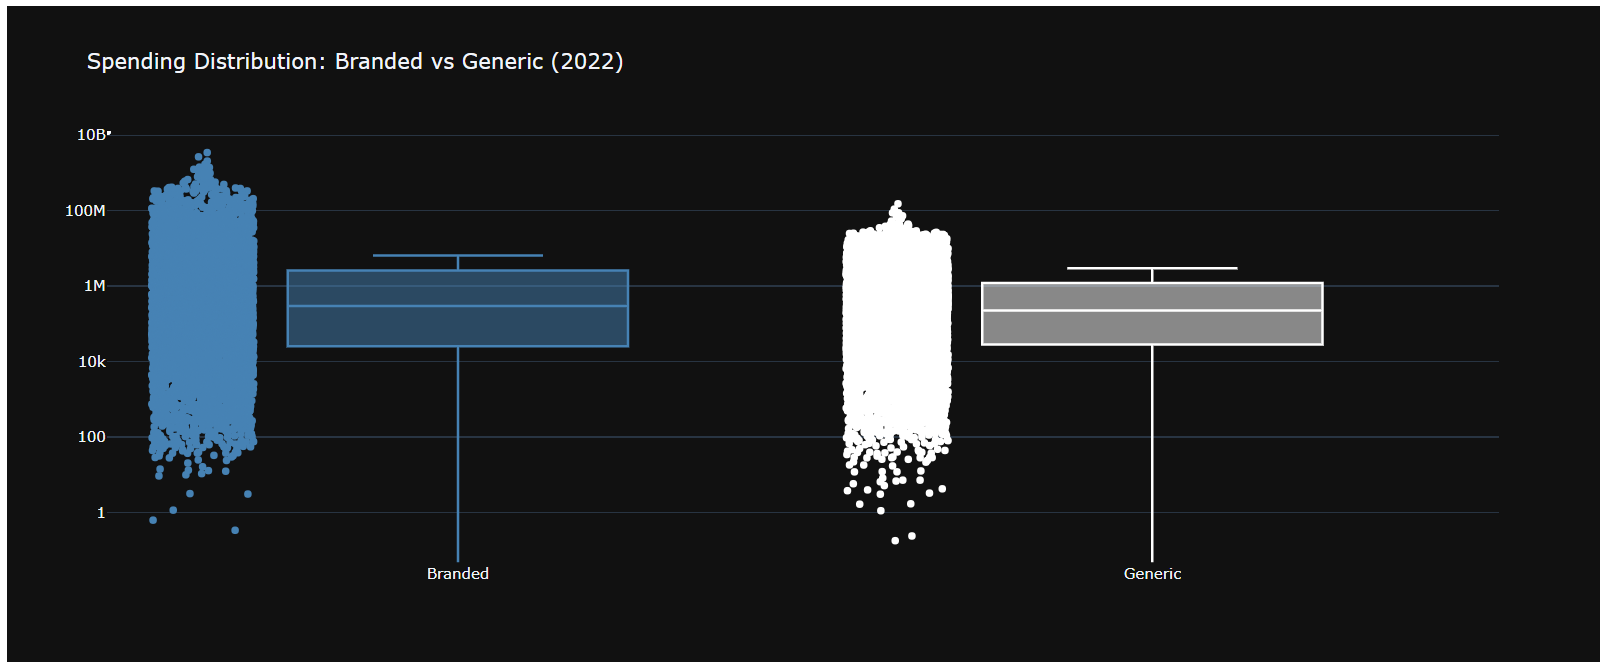

In [252]:
display(Image(filename='Plots/box_spending_branded_vs_generic.png'))

In [ ]:
#Format Spending Function
def format_spending(x):
    if x >= 1_000_000_000:
        return f"{x/1_000_000_000:.1f}B"
    elif x >= 1_000_000:
        return f"{x/1_000_000:.0f}M"
    else:
        return f"{x:,.0f}"

<h2>Which drugs account for the top 15 highest total spending?</h2>
<h2 id="top-spending-drugs" style="display: none;"></h2>

In [ ]:
top_15_spending_2022 = df[['brand_name_cleaned', 'total_spending_2022', 'drug_type', 'manufacturer_name']].nlargest(15, 'total_spending_2022').copy()

top_15_spending_2022['formatted_spending'] = top_15_spending_2022['total_spending_2022'].apply(format_spending)

fig = px.bar(
    top_15_spending_2022,
    x='total_spending_2022',
    y='brand_name_cleaned',
    orientation='h',
    title='Top 15 Drugs by Medicaid Total Spending (2022)',
    labels={'total_spending_2022': 'Spending', 
            'brand_name_cleaned': 'Brand Name', 
            'formatted_spending': 'Formatted Spending',
            'drug_type':'Drug Type',
            'manufacturer_name':'Manufacturer Name'
           },
    template='plotly_dark',
    text='formatted_spending',
    color='total_spending_2022',
    color_continuous_scale='greens',
    hover_name='brand_name_cleaned',
    hover_data=['drug_type', 'manufacturer_name']
)

fig.update_traces(textposition='outside')
fig.update_coloraxes(showscale=False)
fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=False 
    ),
    yaxis=dict(
        categoryorder='total ascending',
        title='',      
        showticklabels=True
    ),
    showlegend=False
)

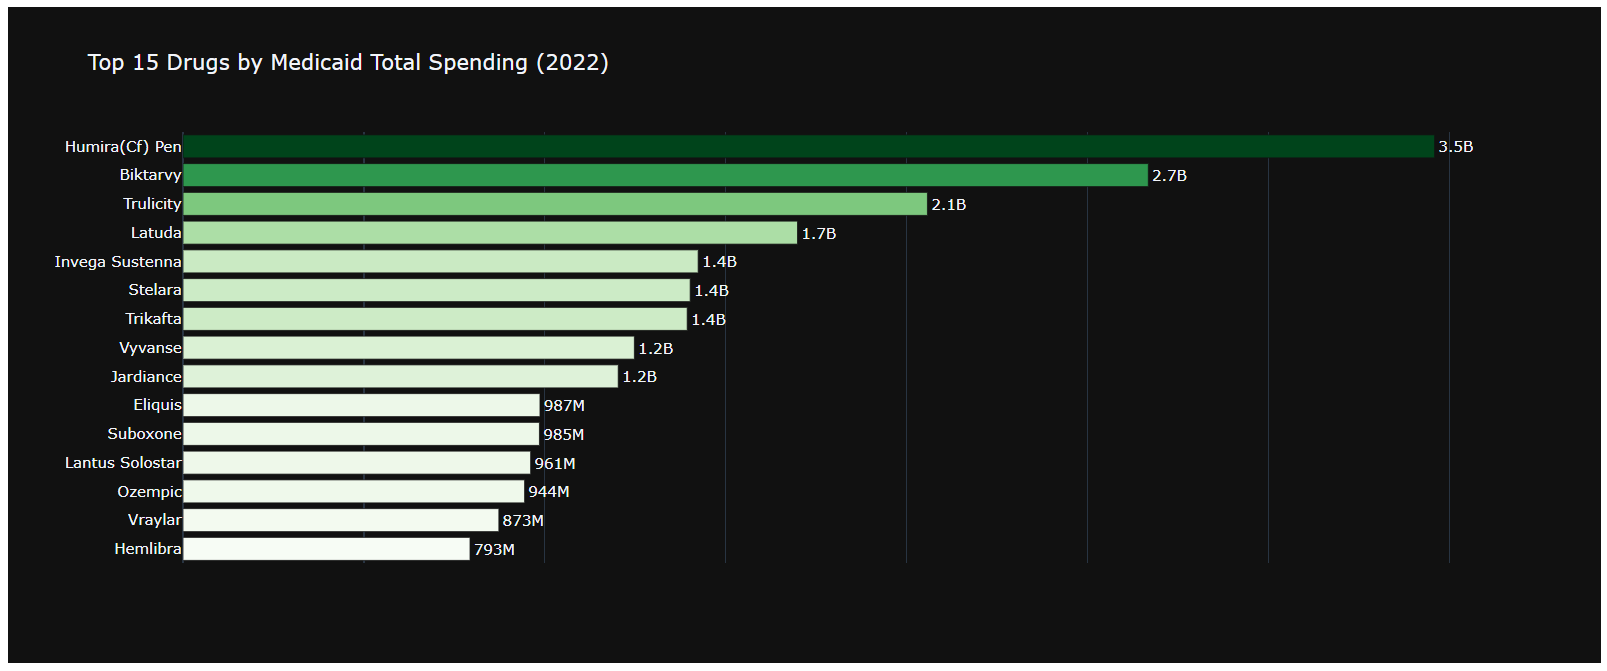

In [253]:
display(Image(filename='Plots/top_15_spending.png'))

<h2>Which manufacturers are responsible for producing these high-spending drugs?</h2>
<h2 id="top-manufacturers" style="display: none;"></h2>

In [ ]:
fig = px.bar(
    top_15_spending_2022,
    x='total_spending_2022',
    y='manufacturer_name',
    orientation='h',
    title='Top 15 Drugs by Medicaid Total Spending (2022) – Manufacturer View',
    labels={
        'total_spending_2022': 'Spending',
        'manufacturer_name': 'Manufacturer Name',
        'formatted_spending': 'Formatted Spending',
        'drug_type': 'Drug Type',
        'brand_name_cleaned': 'Brand Name'
    },
    template='plotly_dark',
    text='formatted_spending',
    color='total_spending_2022',
    color_continuous_scale='darkmint',
    hover_name='brand_name_cleaned',
    hover_data=['drug_type', 'brand_name_cleaned']
)

fig.update_traces(textposition='outside')
fig.update_coloraxes(showscale=False)
fig.update_layout(
    xaxis=dict(title='', showticklabels=False),
    yaxis=dict(categoryorder='total ascending', title='', showticklabels=True),
    showlegend=False
)

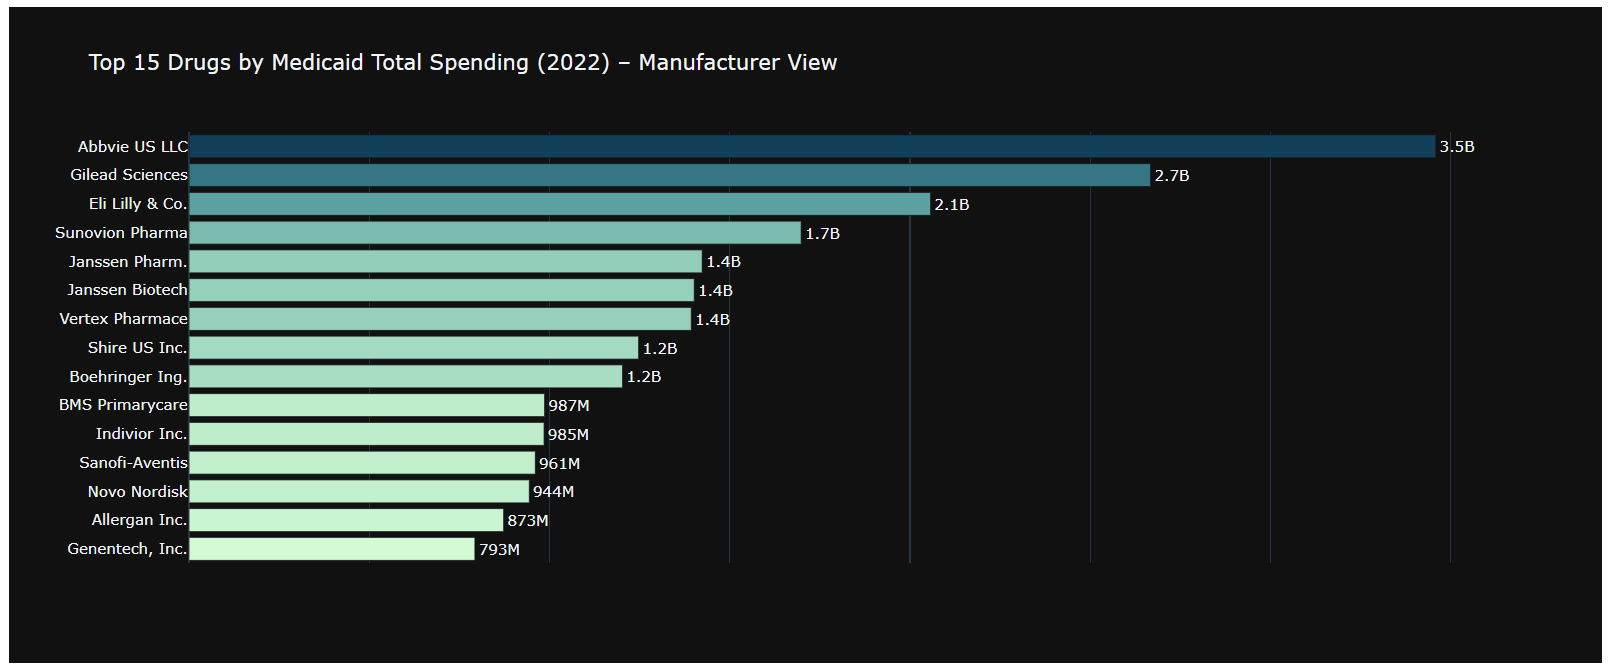

In [254]:
display(Image(filename='Plots/top_15_spending_manufacturers.png'))

<h2>What are the primary factors contributing to the elevated spending on these drugs?</h2>
<h2 id="spending-factors" style="display: none;"></h2>

In [ ]:
top_15_drugs = df.nlargest(15, 'total_spending_2022').copy()

summary_df = top_15_drugs[[
    'brand_name', 
    'manufacturer_name',
    'drug_type',
    'total_spending_2022',
    'total_claims_2022',
    'average_spending_per_claim_2022',
    'total_dosage_units_2022',
    'average_spending_per_dosage_unit_weighted_2022',
    'cagr_average_spending_per_dosage_unit_2018_2022'
]].copy()

summary_df['total_spending_2022'] = summary_df['total_spending_2022'].apply(lambda x: f"${x:,.0f}")
summary_df['total_dosage_units_2022'] = summary_df['total_dosage_units_2022'].apply(lambda x: f"{x:,.0f}")
summary_df['average_spending_per_claim_2022'] = summary_df['average_spending_per_claim_2022'].apply(lambda x: f"${x:,.0f}")
summary_df['average_spending_per_dosage_unit_weighted_2022'] = summary_df['average_spending_per_dosage_unit_weighted_2022'].apply(lambda x: f"${x:,.0f}")
summary_df['cagr_average_spending_per_dosage_unit_2018_2022'] = summary_df['cagr_average_spending_per_dosage_unit_2018_2022'].apply(lambda x: f"{x:.2f}%")

summary_df = summary_df.round(2)
summary_df.reset_index(drop=True, inplace=True)
summary_df

<h3 style="margin-bottom: 10px; font-weight: bold;">Answer</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>High Cost per Claim and Dosage Unit:</strong> The leading contributor to elevated Medicaid spending is the exceptionally high 
      <code>average spending per claim</code> and <code>per dosage unit</code> for certain drugs. Examples include:
      <ul style="margin-top: 6px; list-style-type: disc; padding-left: 20px;">
        <li><strong>Stelara</strong> – $22,002 per claim | $23,395 per unit</li>
        <li><strong>Hemlibra</strong> – $29,040 per claim | $13,251 per unit</li>
        <li><strong>Trikafta</strong> – $24,800 per claim</li>
        <li><strong>Humira</strong> – $8,046 per claim | $3,289 per unit</li>
      </ul>
    </li>
    <li style="margin-top: 8px;">
      <strong>Large Patient Volume:</strong> Several drugs also accumulate high total spending due to <strong>high claim volume</strong>, even when unit prices are moderate.
      <ul style="margin-top: 6px; list-style-type: disc; padding-left: 20px;">
        <li><strong>Vyvanse</strong> – 3.68M claims</li>
        <li><strong>Suboxone</strong> – 3.34M claims</li>
        <li><strong>Trulicity</strong> – 2.10M claims</li>
        <li><strong>Lantus Solostar</strong> – 2.01M claims</li>
      </ul>
    </li>
    <li style="margin-top: 8px;">
      <strong>Brand-Only Availability:</strong> All of the top 15 drugs are <strong>branded</strong>, and most lack generic alternatives or 
      have only recently seen biosimilar competition. This restricts pricing flexibility and sustains elevated unit costs.
    </li>
    <li style="margin-top: 8px;">
      <strong>Steady or Growing Price Trends:</strong> Even though some drugs have relatively low CAGR (<code>Compound Annual Growth Rate</code>) in spending per unit (e.g. Trikafta, Vraylar, Ozempic), 
      their initial price points are already high, compounding overall cost impact over time.
    </li>
    <li style="margin-top: 8px;">
      <strong>Specialty and Chronic Conditions:</strong> Several of these drugs treat <em>complex, chronic, or rare conditions</em> (e.g. Hemophilia, HIV, Cystic Fibrosis, Psoriasis), 
      which require specialty formulations and continuous use — both of which contribute to high expenditures.
    </li>
  </ul>
</div>


<h2>Are there viable, cost-effective alternatives available for these high-cost drugs?</h2>
<h2 id="cost-effective-alternatives" style="display: none;"></h2>

In [ ]:
cost_effective_alternatives = [
    {"High-cost Drug": "Humira", "Branded Price per Unit (2022)": 3289.0, "Recommended Alternative": "Amjevita, Cyltezo, Simlandi", "Alternative Type": "Biosimilar (Generic Equivalent)", "Alternative Price per Unit (2022)": "$551 - $3,437.50", "Alternative Found": "Yes"},
    {"High-cost Drug": "Biktarvy", "Branded Price per Unit (2022)": 116.0, "Recommended Alternative": "Dovato", "Alternative Type": "Therapeutic alternative (HIV regimen)", "Alternative Price per Unit (2022)": "$108.03", "Alternative Found": "Yes"},
    {"High-cost Drug": "Trulicity", "Branded Price per Unit (2022)": 428.0, "Recommended Alternative": "Metformin", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.14", "Alternative Found": "Yes"},
    {"High-cost Drug": "Latuda", "Branded Price per Unit (2022)": 47.0, "Recommended Alternative": "Risperidone", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.07", "Alternative Found": "Yes"},
    {"High-cost Drug": "Invega Sustenna", "Branded Price per Unit (2022)": 1977.0, "Recommended Alternative": "Risperidone", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.07", "Alternative Found": "Yes"},
    {"High-cost Drug": "Stelara", "Branded Price per Unit (2022)": 23395.0, "Recommended Alternative": "Methotrexate", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.27", "Alternative Found": "Yes"},
    {"High-cost Drug": "Trikafta", "Branded Price per Unit (2022)": 296.0, "Recommended Alternative": "Ivacaftor, Dornase alfa", "Alternative Type": "Therapeutic alternative", "Alternative Price per Unit (2022)": "Data not available", "Alternative Found": "No"},
    {"High-cost Drug": "Vyvanse", "Branded Price per Unit (2022)": 11.0, "Recommended Alternative": "Generic Adderall (Amphetamine/dextroamphetamine)", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.45", "Alternative Found": "Yes"},
    {"High-cost Drug": "Jardiance", "Branded Price per Unit (2022)": 18.0, "Recommended Alternative": "Metformin", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.14", "Alternative Found": "Yes"},
    {"High-cost Drug": "Eliquis", "Branded Price per Unit (2022)": 9.0, "Recommended Alternative": "Warfarin", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.14", "Alternative Found": "Yes"},
    {"High-cost Drug": "Suboxone", "Branded Price per Unit (2022)": 9.0, "Recommended Alternative": "Buprenorphine/Naloxone", "Alternative Type": "Generic equivalent available", "Alternative Price per Unit (2022)": "$4.94", "Alternative Found": "Yes"},
    {"High-cost Drug": "Lantus Solostar", "Branded Price per Unit (2022)": 28.0, "Recommended Alternative": "Insulin Glargine biosimilar (Semglee)", "Alternative Type": "Biosimilar (Generic Equivalent)", "Alternative Price per Unit (2022)": "Data not available", "Alternative Found": "No"},
    {"High-cost Drug": "Ozempic", "Branded Price per Unit (2022)": 439.0, "Recommended Alternative": "Metformin", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.14", "Alternative Found": "Yes"},
    {"High-cost Drug": "Vraylar", "Branded Price per Unit (2022)": 42.0, "Recommended Alternative": "Risperidone", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "$0.07", "Alternative Found": "Yes"},
    {"High-cost Drug": "Hemlibra", "Branded Price per Unit (2022)": 13251.0, "Recommended Alternative": "Antihemophilic factor", "Alternative Type": "Generic therapeutic alternative", "Alternative Price per Unit (2022)": "Data not available", "Alternative Found": "No"},
]

final_cost_effective_alternatives = pd.DataFrame(cost_effective_alternatives)
final_cost_effective_alternatives

<h3 style="margin-bottom: 10px; font-weight: bold;">Answer</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Summary:</strong> Out of the 15 highest-cost drugs in Medicaid's 2022 spending, 
      <strong>12 have viable cost-effective alternatives</strong> in the form of biosimilars, generics, or therapeutic substitutes. 
      These alternatives offer equivalent treatment efficacy with dramatically lower per-unit costs, 
      enabling significant cost savings opportunities.
    </li>
    <li style="margin-top: 8px;">
      <strong>Examples of Extreme Savings:</strong>
      <ul style="margin-top: 6px; list-style-type: disc; padding-left: 20px;">
        <li><strong>Stelara</strong> – $23,395 vs. <strong>Methotrexate</strong> – $0.27</li>
        <li><strong>Humira</strong> – $3,289 vs. <strong>Amjevita/Cyltezo</strong> – $551–$3,437</li>
        <li><strong>Latuda</strong> – $47 vs. <strong>Risperidone</strong> – $0.07</li>
        <li><strong>Trulicity</strong> – $428 vs. <strong>Metformin</strong> – $0.14</li>
      </ul>
    </li>
    <li style="margin-top: 8px;">
      <strong>Alternatives Missing or Unavailable:</strong>
      Three high-cost drugs (<em>Trikafta</em>, <em>Lantus Solostar</em>, and <em>Hemlibra</em>) 
      currently lack clearly identified cost-effective alternatives or public price transparency for those alternatives. 
      These should be prioritized for future biosimilar development or competitive substitution.
    </li>
    <li style="margin-top: 8px;">
      <strong>Conclusion:</strong> Medicaid programs have substantial cost-saving potential by shifting prescribing practices 
      toward these more affordable and therapeutically equivalent options. Adopting such alternatives can significantly reduce 
      expenditures without sacrificing patient outcomes.
    </li>
  </ul>
</div>


<h2 id="20182022-trends-eda" style="display: none;"></h2>
<div style="
    background-color: #222;
    border-left: 6px solid purple;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 100%;
">
<h1>2018-2022 Reporting History & Overall Data EDA</h1> 
    Goal: Understand long-term trends and identify unsustainable cost increases.
</div>

In [ ]:
drug_type_counts = df_overall_complete['drug_type'].value_counts().reset_index()
drug_type_counts.columns = ['drug_type', 'count']

fig = px.bar(
    drug_type_counts,
    x='drug_type',
    y='count',
    title='Drug Type Distribution',
    labels={'drug_type': 'Drug Type', 'count': 'Count'},
    template='plotly_dark',
    color='drug_type',
    text='count',
    color_discrete_map={'Generic': 'white', 'Branded': 'steelblue'},
    category_orders={'drug_type': ['Generic', 'Branded']}
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=True 
    ),
    yaxis=dict(
        title='',      
        showticklabels=False
    ),
    showlegend=False
)

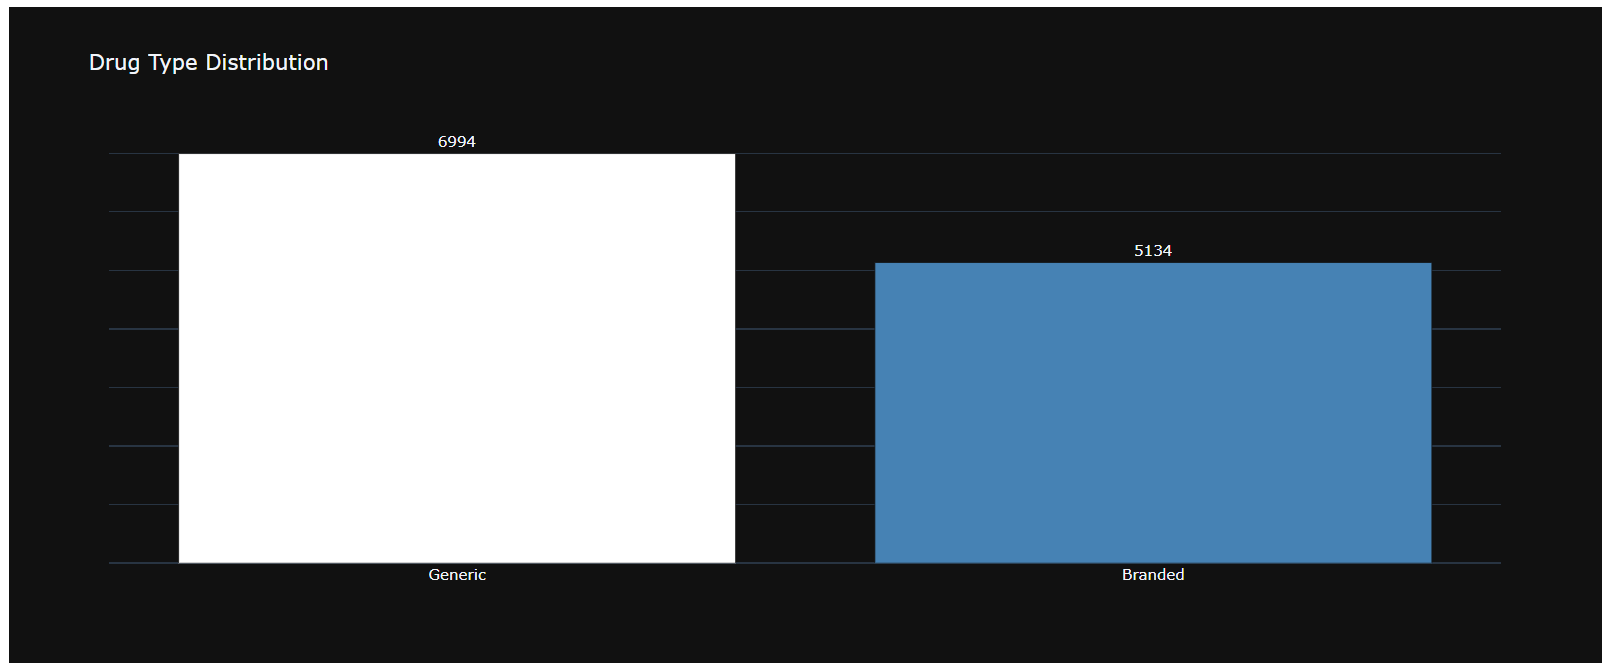

In [255]:
display(Image(filename='Plots/drug_type_distribution_cagr.png'))

In [256]:
df_overall_complete['cagr_average_spending_per_dosage_unit_2018_2022'].describe()

count    3307.000000
mean        0.066902
std         0.305498
min        -0.775017
25%        -0.027506
50%         0.026537
75%         0.079228
max         6.535251
Name: cagr_average_spending_per_dosage_unit_2018_2022, dtype: float64

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid purple;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      The dataset contains <strong>3,307 entries</strong> with valid Compound Annual Growth Rate (CAGR) values for average spending per dosage unit between 2018–2022.
    </li>
    <li style="margin-top: 8px;">
      The <strong>mean CAGR is 0.07</strong>, indicating that, on average, Medicaid spending per dosage unit grew by approximately <strong>7%</strong> annually.
    </li>
    <li style="margin-top: 8px;">
      The <strong>median CAGR is 0.03</strong>, showing that half of all drugs grew at a slower rate (3% or less), highlighting a right-skewed distribution with some high-growth outliers.
    </li>
    <li style="margin-top: 8px;">
      A <strong>quarter of the drugs (25%)</strong> experienced a decline in spending per unit (CAGR < 0), with the minimum recorded at <strong>-78%</strong>.
    </li>
    <li style="margin-top: 8px;">
      The top 25% of drugs grew at a rate above <strong>8%</strong>, and the most extreme growth observed was <strong>654%</strong>, suggesting the presence of a few drugs with dramatic pricing increases.
    </li>
    <li style="margin-top: 8px;">
      The <strong>standard deviation of 0.31</strong> suggests significant variability across drugs, reinforcing the importance of identifying high-growth outliers for further analysis or policy action.
    </li>
  </ul>
</div>


In [ ]:
custom_data = df_overall_complete[['brand_name_cleaned', 'drug_type']].values

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Histogram (Log Scale)", "Box Plot"),
    shared_yaxes=False
)

fig.add_trace(
    go.Histogram(
        x=df_overall_complete['cagr_average_spending_per_dosage_unit_2018_2022'],
        name='Histogram',
        marker=dict(color='steelblue'),
        nbinsx=30
    ),
    row=1, col=1
)

fig.update_yaxes(type='log', row=1, col=1)
fig.add_trace(
    go.Box(
        y=df_overall_complete['cagr_average_spending_per_dosage_unit_2018_2022'],
        name='Box Plot',
        marker=dict(color='orange'),
        boxmean='sd',
        customdata=custom_data,
        hovertemplate='<b>%{customdata[0]}</b><br>Type: %{customdata[1]}<br>CAGR: %{y:.2f}%<extra></extra>'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribution of CAGR Per Dosage Unit (2018-2022)",
    template='plotly_dark',
    showlegend=False
)

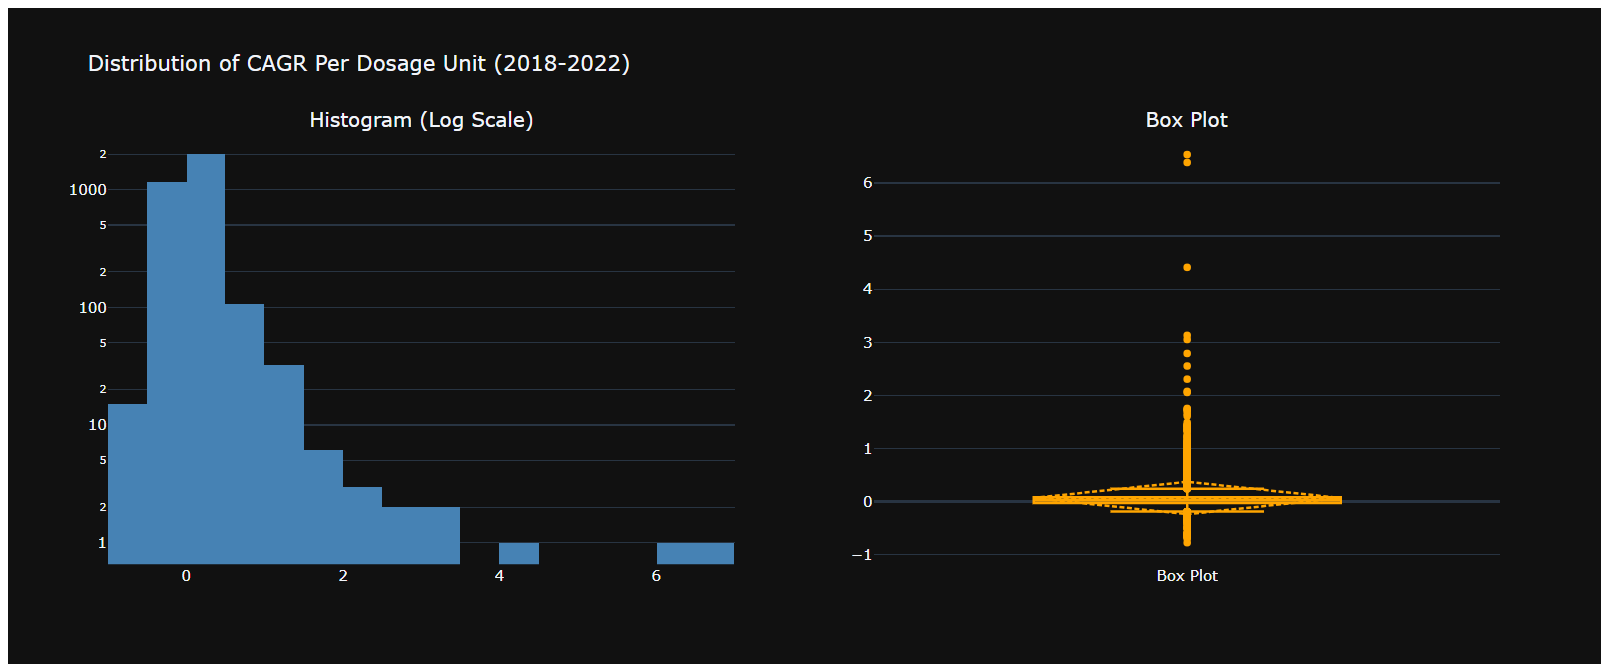

In [257]:
display(Image(filename='Plots/hist_box_cagr.png'))

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid purple;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      The distribution of <code>cagr_average_spending_per_dosage_unit_2018_2022</code> is <strong>right-skewed</strong>, meaning that the majority of drugs experienced either modest increases or decreases in per-unit spending over time, while a smaller number exhibited extreme growth.
    </li>
    <li style="margin-top: 8px;">
      This positive skew suggests that <strong>overall Medicaid drug spending trends may be disproportionately influenced by a limited number of high-growth drugs</strong>, emphasizing the importance of monitoring outliers that could significantly drive future expenditures.
    </li>
  </ul>
</div>


In [ ]:
fig = px.box(
    df_overall_complete,
    x='drug_type',
    y='cagr_average_spending_per_dosage_unit_2018_2022',
    points='all',
    title='CAGR Distribution: Branded vs Generic (2018-2022)',
    template='plotly_dark',
    color='cagr_average_spending_per_dosage_unit_2018_2022',
    hover_name='brand_name_cleaned',
    labels={
        'cagr_average_spending_per_dosage_unit_2018_2022': 'CAGR Avg Spending Per Dosage Unit (2018-2022)',
        'drug_type': 'Drug Type',
        'brand_name_cleaned':'Brand Name'
    },
    category_orders={'drug_type': ['Generic', 'Branded']}
)

fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=True 
    ),
    yaxis_type='log',
    yaxis=dict(
        title='',      
        showticklabels=True
    ),
    showlegend=False
)

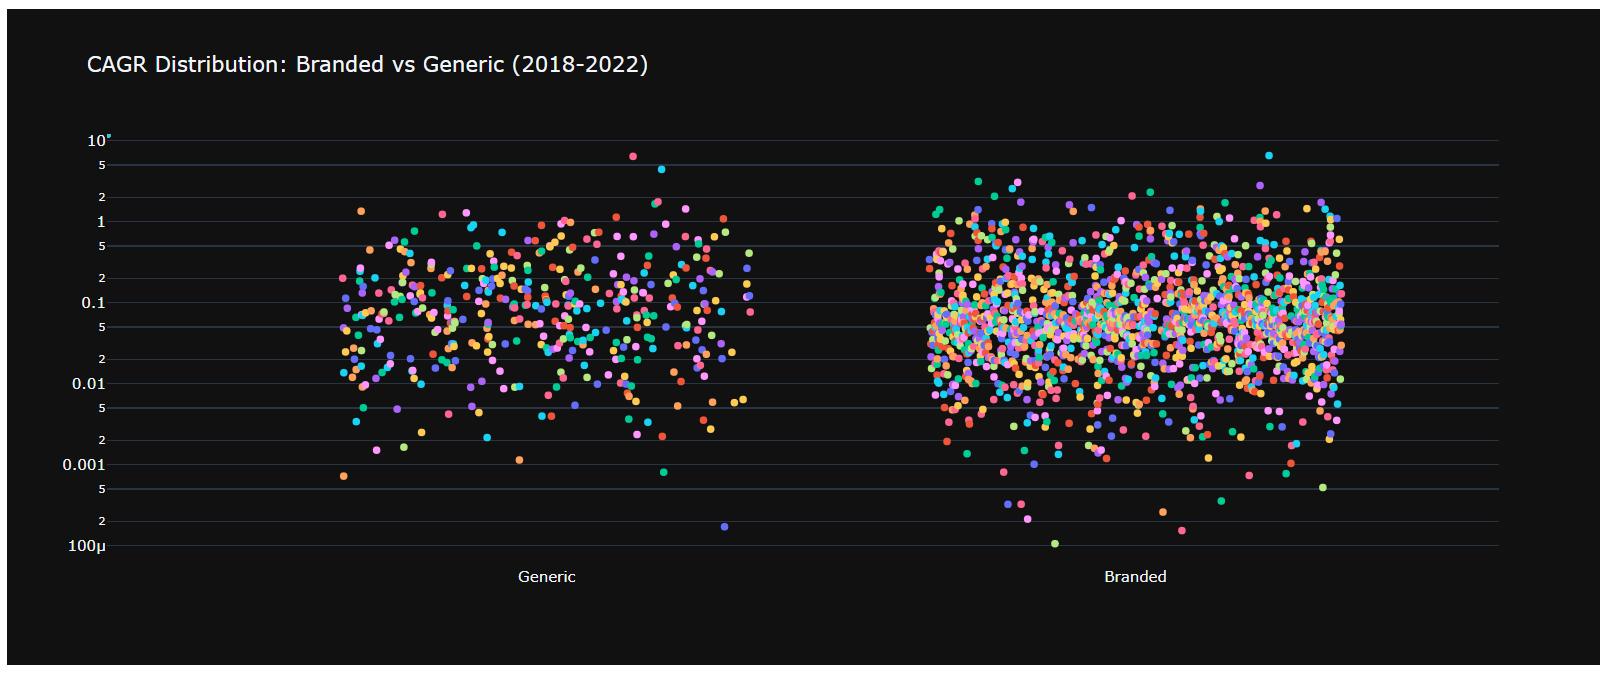

In [258]:
display(Image(filename='Plots/box_cagr_generic_vs_branded.png'))

In [ ]:
features = [
    'total_spending_2018',
    'total_spending_2019',
    'total_spending_2020',
    'total_spending_2021',
    'total_spending_2022',
    'cagr_average_spending_per_dosage_unit_2018_2022'
]

pairplot_df = df_overall_complete[features + ['drug_type'] + 
    ['brand_name_cleaned']].copy()

for col in features:
    pairplot_df[col] = np.log1p(pairplot_df[col])

fig = px.scatter_matrix(
    pairplot_df,
    dimensions=features,
    color='drug_type',
    title='Log-Transformed Scatter Matrix of Spending Trends and CAGR by Drug Type',
    opacity=0.6,
    labels={col: col.replace('_', ' ').title() for col in features},
    template='plotly_dark',
    hover_name='brand_name_cleaned',
)

fig.update_layout(
    width=900,
    height=900,
    dragmode='select',
    hovermode='closest',
)

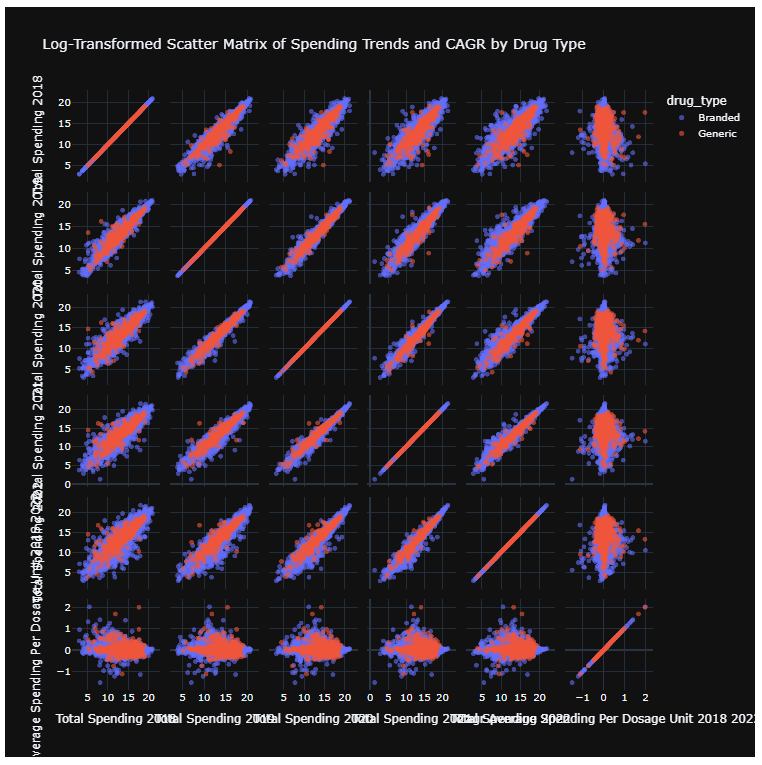

In [259]:
display(Image(filename='Plots/matrix.png'))

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid purple;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Spending is Consistent Across Years:</strong> Total drug spending shows very strong positive correlations between each year (e.g., 2018–2022), with coefficients ranging from <strong>0.88 to 0.98</strong>. This confirms that high-cost drugs tend to remain expensive over time.
    </li>
    <li style="margin-top: 8px;">
      <strong>CAGR Has Weak or Negative Correlation with Spending:</strong> The compound annual growth rate (CAGR) of spending per dosage unit is <strong>negatively correlated</strong> with yearly total spending. For example, CAGR vs. 2018 spending shows a correlation of <strong>-0.17</strong>. This suggests that drugs growing fastest in cost per unit are not necessarily those with the highest total expenditures.
    </li>
    <li style="margin-top: 8px;">
      <strong>Rising-Cost Drugs May Be Emerging Risks:</strong> While major budget impact is driven by consistently expensive drugs, smaller-spending drugs with rapidly increasing costs may pose <em>future financial risk</em> and are worth monitoring.
    </li>
  </ul>
</div>


In [ ]:
corr_matrix = df_overall_complete.select_dtypes(include='number').corr()

fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    aspect="auto",
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap"
)

fig.update_xaxes(tickangle=45)
fig.update_layout(
    template='plotly_dark',
    width=900,
    height=800
)

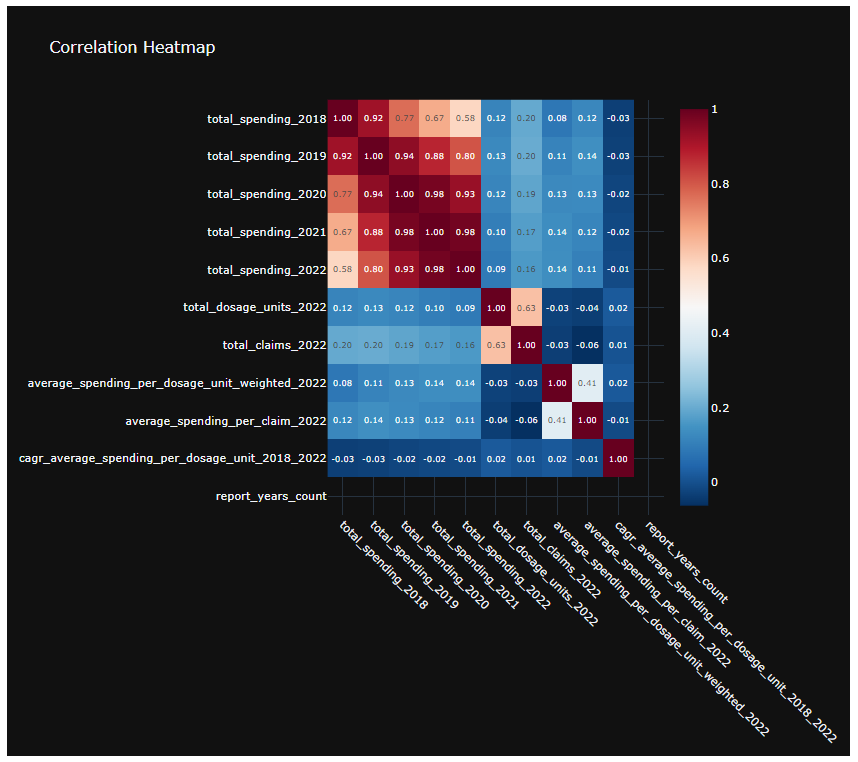

In [260]:
display(Image(filename='Plots/heatmap.png'))

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid purple;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Strong Positive Correlations Among Yearly Spending:</strong> Annual total spending variables (2018–2022) are highly correlated with one another (ρ &gt; 0.95), indicating that top-spending drugs remain consistently expensive over time.
    </li>
    <li style="margin-top: 8px;">
      <strong>Dosage Units and Claims Are Closely Related:</strong> Total dosage units and total claims per year show strong correlations, reflecting the fact that high-volume drugs tend to drive both metrics in parallel.
    </li>
    <li style="margin-top: 8px;">
      <strong>Average Spending Metrics Show Weak or Moderate Relationships:</strong> Features like average spending per dosage unit or per claim do not exhibit strong correlations with total spending, suggesting that unit price is not always the dominant cost driver — volume plays a key role.
    </li>
    <li style="margin-top: 8px;">
      <strong>CAGR Appears Independent:</strong> The compound annual growth rate of spending per dosage unit (CAGR) shows weak or near-zero correlations with most other numeric features, highlighting its value as a standalone metric for identifying growth outliers.
    </li>
  </ul>
</div>

<h2>Which drugs exhibit the highest Compound Annual Growth Rate (CAGR) in average spending per dosage unit from 2018 to 2022?</h2>
<h2 id="top-cagr-drugs" style="display: none;"></h2>

In [ ]:
top_cagr_drugs = df_overall_complete[df_overall_complete['drug_type'] == 'Branded']
top_cagr_drugs = top_cagr_drugs.nlargest(15, 'cagr_average_spending_per_dosage_unit_2018_2022')

top_cagr_drugs['cagr_text'] = top_cagr_drugs['cagr_average_spending_per_dosage_unit_2018_2022'].apply(lambda x: f"{x:.2f}%")

fig = px.bar(
    top_cagr_drugs,
    x='cagr_average_spending_per_dosage_unit_2018_2022',
    y='brand_name_cleaned',
    orientation='h',
    title='Top 15 Drugs by CAGR of Avg Spending per Dosage Unit (2018-2022)',
    color='brand_name_cleaned',
    labels={
        'cagr_average_spending_per_dosage_unit_2018_2022':'Compound Annual Growth CAGR (%)',
        'brand_name_cleaned':'Drug Name',
    },
    template='plotly_dark',
    text='cagr_text',
    hover_name='brand_name_cleaned',
    hover_data=['drug_type']
)

fig.update_traces(textposition='auto')
fig.update_layout(
    xaxis=dict(title='', showticklabels=False),
    yaxis=dict(
        title='',
        showticklabels=True
    ),
    showlegend=False
)

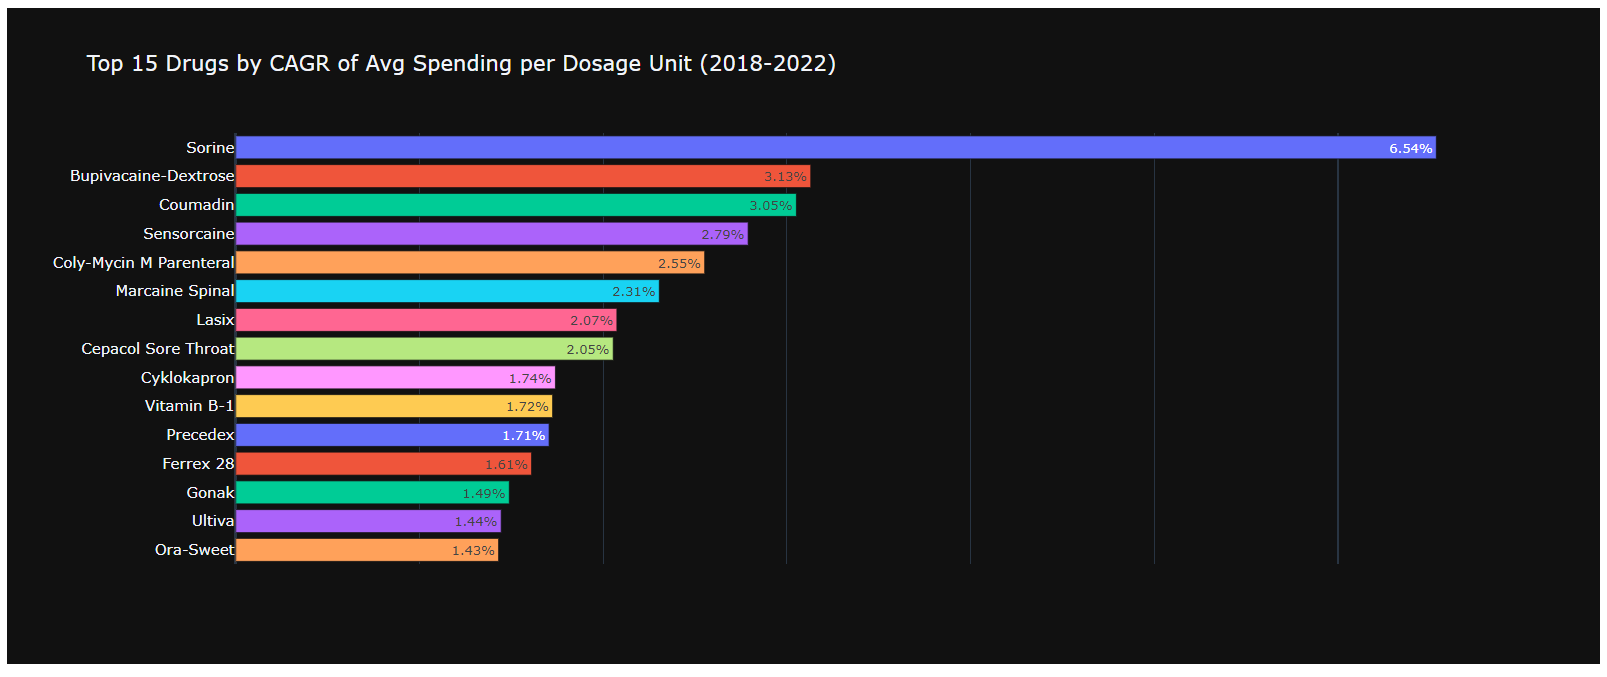

In [261]:
display(Image(filename='Plots/top_15_cagr.png'))

<h3 style="margin-bottom: 10px; font-weight: bold;">Insights</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid purple;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Sharp Increases in Unit Pricing:</strong> These top-ranked drugs are exhibiting significant growth in unit costs over time. This may reflect new product formulations, dose-specific pricing adjustments, or manufacturer price hikes targeting specialty treatments with limited competition.
    </li>
    <li style="margin-top: 8px;">
      <strong>Lack of Generic or Biosimilar Competition:</strong> Many drugs in this group are still protected by patents or lack viable therapeutic alternatives. This gives manufacturers pricing power and contributes to sustained growth in per-unit spending.
    </li>
    <li style="margin-top: 8px;">
      <strong>Emerging or Niche Market Expansion:</strong> Some drugs with the highest CAGR are relatively new or are expanding into broader patient populations or additional clinical indications, which often results in steep pricing escalations during early adoption phases.
    </li>
    <li style="margin-top: 8px;">
      <strong>Specialty & Biologic Drug Trends:</strong> Several of these high-CAGR drugs may be complex biologics or specialty medications. These tend to have fewer dosage units administered but carry significantly higher price tags per unit.
    </li>
  </ul>
</div>

<h2>Which drugs have exhibited the highest cumulative Medicaid spending from 2018 to 2022?</h2>
<h2 id="cumulative-spending" style="display: none;"></h2>

In [ ]:
df_trends = df_overall_complete.melt(
    id_vars=['brand_name_cleaned', 'drug_type'],
    value_vars=[
        'total_spending_2018', 'total_spending_2019',
        'total_spending_2020', 'total_spending_2021',
        'total_spending_2022'
    ],
    var_name='year', value_name='total_spending'
)

df_trends['year'] = df_trends['year'].str.extract('(\d{4})')

top_drugs = df_overall_complete.nlargest(15, 'total_spending_2022')['brand_name_cleaned']
df_top_trends = df_trends[df_trends['brand_name_cleaned'].isin(top_drugs)]

fig = px.line(
    df_top_trends, x='year', y='total_spending', color='brand_name_cleaned',
    title='Top 15 Medicaid Drugs Spending Trends (2018-2022)',
    labels={
        'total_spending':'Spending',
        'year':'Year', 
        'brand_name_cleaned':'Brand Name',
        'drug_type': 'Drug Type'
    },
    template='plotly_dark',
    hover_name='brand_name_cleaned',
    hover_data=['drug_type'],
    markers=True,
    
)

fig.update_layout(
    xaxis=dict(
        title='',   
        showticklabels=True 
    ),
    yaxis=dict(
        categoryorder='total ascending', 
        title='', 
        showticklabels=True
    ),
)

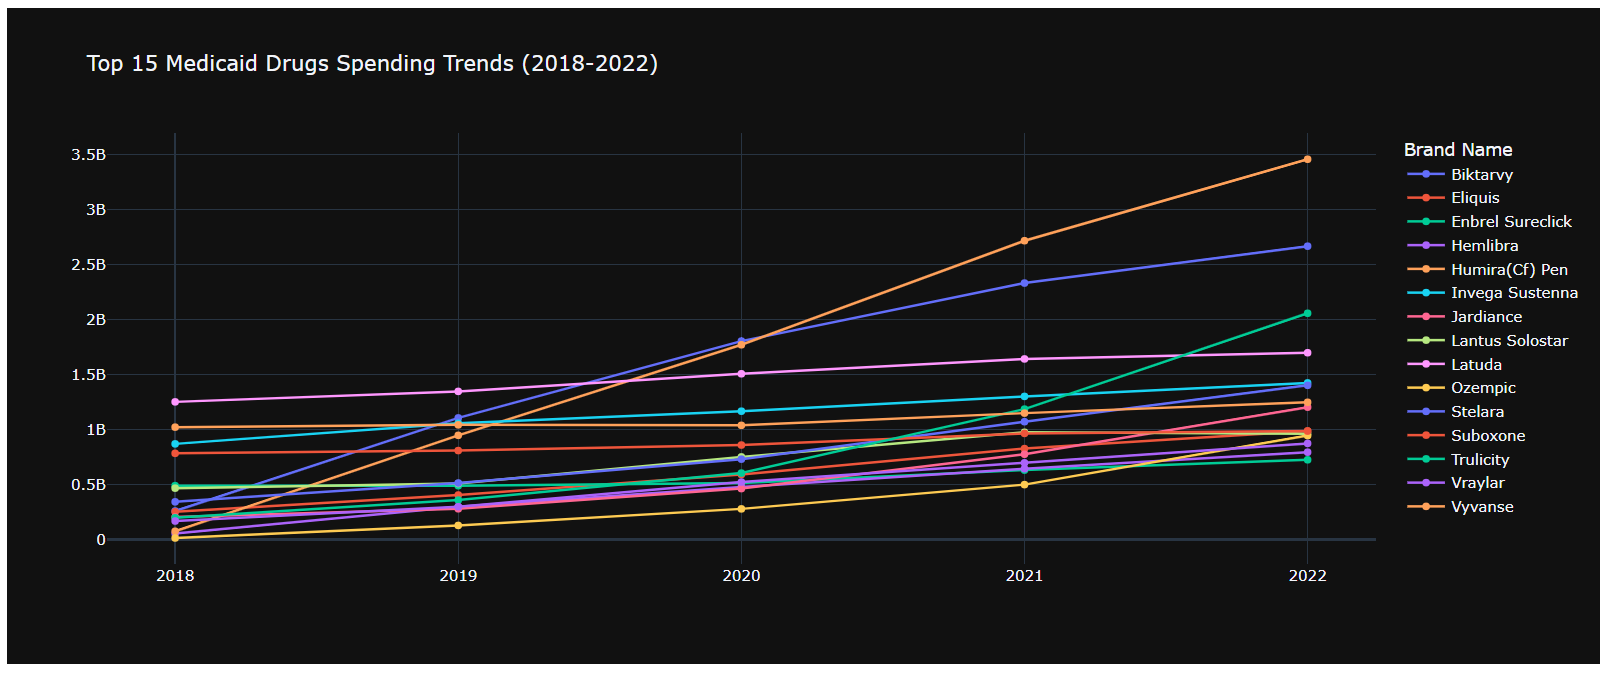

In [262]:
display(Image(filename='Plots/top_15_spending_trends.png'))

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid purple;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Persistent Dominance by a Few High-Cost Drugs:</strong> Spending on drugs like Humira, Biktarvy, and Trulicity remained consistently high across all five years, highlighting their sustained financial impact on Medicaid budgets.
    </li>
    <li style="margin-top: 8px;">
      <strong>Upward Spending Trends Despite Market Maturity:</strong> Several drugs continue to show upward spending trajectories even years after launch — potentially due to increased utilization, expanded indications, or annual price escalations.
    </li>
    <li style="margin-top: 8px;">
      <strong>Minimal Drop-off from COVID-19 Period:</strong> Despite potential disruptions during 2020–2021, most top drugs did not exhibit significant dips in spending, suggesting consistent demand and coverage across the pandemic years.
    </li>
    <li style="margin-top: 8px;">
      <strong>Limited Spending Diversification:</strong> The top 15 drugs appear to maintain their dominance year over year, indicating a concentrated share of spending within a relatively small set of therapies.
    </li>
  </ul>
</div>


<h2 id="full-report" style="display: none;"></h2>
<div style="
    background-color: #1e1e1e;
    color: #e0f7fa;
    border-left: 6px solid #00bfa5;
    padding: 20px 28px;
    margin-bottom: 20px;
    font-size: 16px;
    line-height: 1.7;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 191, 165, 0.3);
">
  <h2 style="margin-top: 0; font-size: 22px; font-weight: bold; color: #1de9b6;">📘 Full Report</h2>
  <p style="margin-bottom: 12px;">
    If you’d like to explore a polished report of this analysis feel free to check out the full report hosted on my website:
    <br>
    <a href="https://yourwebsite.com" target="_blank" style="color: #80deea; text-decoration: none; font-weight: bold;">
      ➤ View the Full Report Here
    </a>
  </p>
</div>

<h2 id="thank-you" style="display: none;"></h2>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #2196F3;
    padding: 20px 28px;
    font-size: 16px;
    line-height: 1.7;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(33, 150, 243, 0.3);
">
  <h2 style="margin-top: 0; font-size: 22px; font-weight: bold; color: #4FC3F7;">🎓 Thank You for Visiting!</h2>
  <p style="margin-bottom: 12px;">
    I'm incredibly grateful that you took the time to explore my Medicaid Drug Spending EDA project.
    It’s a topic that I care about deeply, and I hope it sparked some meaningful insights or ideas for you.
  </p>
  <p style="margin-bottom: 12px;">
    If you found it helpful, please consider leaving a like or sharing your thoughts — feedback is always welcome!
  </p>
  <p style="margin-bottom: 12px;">
    I'd also love to connect and grow alongside others who are passionate about data and healthcare.<br>
    You can find me on LinkedIn and join my journey:
    <br>
    <a href="https://www.linkedin.com/in/eduardo-licea-9575a3333" target="_blank" style="color: #64B5F6; text-decoration: none; font-weight: bold;">
      ➤ Connect with me on my LinkedIn!
    </a>
  </p>
</div>